# Historical Forecaster Debugging

In [16]:
a = {"x": 1}
b = {"y": 2}
print(a, b)

{'x': 1} {'y': 2}


In [1]:
from utils import (
                BaseForecaster, 
                ResidualForecaster,
                TimeSeriesPreprocessor,
                crps,
                HistoricalForecaster
)
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
from darts.metrics import smape, rho_risk
import numpy as np
import time
from typing import Optional
from darts.utils.likelihood_models import QuantileRegression
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.utils.likelihood_models import QuantileRegression
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import (
                          BlockRNNModel, 
                          TCNModel, 
                          RNNModel, 
                          TransformerModel, 
                          NLinearModel,
                          DLinearModel,
                          NBEATSModel,
                          XGBModel,
                          LinearRegressionModel,
                          TFTModel,
                         )
import optuna
from optuna.integration import PyTorchLightningPruningCallback
import CRPS.CRPS as forecastscore
from datetime import datetime, timedelta
import matplotlib as mpl
from sklearn.gaussian_process.kernels import RBF
from darts.models import GaussianProcessFilter


os.environ["CUDA_VISIBLE_DEVICES"] = "1"
targets = pd.read_csv("targets.csv.gz")

In [12]:
data_preprocessor = TimeSeriesPreprocessor(input_csv_name = "targets.csv.gz",
                                           load_dir_name = "preprocessed_timeseries/")
data_preprocessor.load()

In [15]:
data_preprocessor.sites_dict["BARC"]["oxygen"]

<TimeSeries (DataArray) (datetime: 2020, component: 1, sample: 500)>
array([[[5.73927306, 5.38176694, 5.79626904, ..., 5.46406721,
         4.76362474, 6.09067565]],

       [[5.93113603, 5.22847989, 5.81611206, ..., 5.54223696,
         5.53806112, 5.52971331]],

       [[6.05556297, 6.30232421, 7.66688133, ..., 6.82344871,
         7.0572597 , 6.27344173]],

       ...,

       [[8.06395953, 8.0955636 , 8.05203623, ..., 8.03924995,
         8.0223985 , 8.07738406]],

       [[8.08785853, 8.07006404, 8.05741831, ..., 8.04148617,
         8.04935665, 8.06438621]],

       [[8.06358842, 7.97823992, 8.01444937, ..., 7.94836083,
         8.00719134, 7.95426017]]])
Coordinates:
  * datetime   (datetime) datetime64[ns] 2017-08-27 2017-08-28 ... 2023-03-08
  * component  (component) <U1 '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [10]:
for site in targets.site_id.unique():
    print(f"\"{site}\"", end=" ")

"ARIK" "BARC" "BIGC" "BLDE" "BLUE" "BLWA" "CARI" "COMO" "CRAM" "CUPE" "FLNT" "GUIL" "HOPB" "KING" "LECO" "LEWI" "LIRO" "MART" "MAYF" "MCDI" "MCRA" "OKSR" "POSE" "PRIN" "PRLA" "PRPO" "REDB" "SUGG" "SYCA" "TECR" "TOMB" "TOOK" "WALK" "WLOU" 

In [5]:
targets

datetime site_id  chla    oxygen  temperature    air_tmp
0     2016-03-05    ARIK   NaN       NaN          NaN  15.171550
1     2016-03-06    ARIK   NaN       NaN          NaN  11.714792
2     2016-03-07    ARIK   NaN       NaN          NaN  11.050146
3     2016-03-08    ARIK   NaN       NaN          NaN   5.545104
4     2016-03-09    ARIK   NaN       NaN          NaN   5.461792
...          ...     ...   ...       ...          ...        ...
60575 2023-07-15    WLOU   NaN  8.689042     6.600715        NaN
60576 2023-07-16    WLOU   NaN  8.696674     6.623221        NaN
60577 2023-07-17    WLOU   NaN  8.646553     6.790127        NaN
60578 2023-07-18    WLOU   NaN  8.579819     7.176267        NaN
60579 2023-07-19    WLOU   NaN  8.554924     7.295042        NaN

[60580 rows x 6 columns]

In [15]:
import CRPS.CRPS as forecastscore
forecastscore([np.nan, np.nan], 2).compute()

(nan, nan, nan)

In [2]:
model = HistoricalForecaster(
                        targets=targets,
                        validation_split_date="2023-03-02",
                        site_id="WLOU",
                        target_variable="chla",
                        output_csv_name=None,
)

model.make_forecasts()

In [3]:
model.forecast_ts

Ok, now I will re-do preprocessing using the improved TimeSeriesPreprocessor object

Do a case study on TOMB data preprocessing step

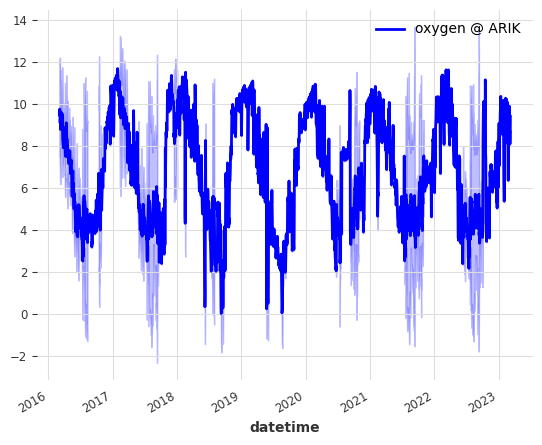

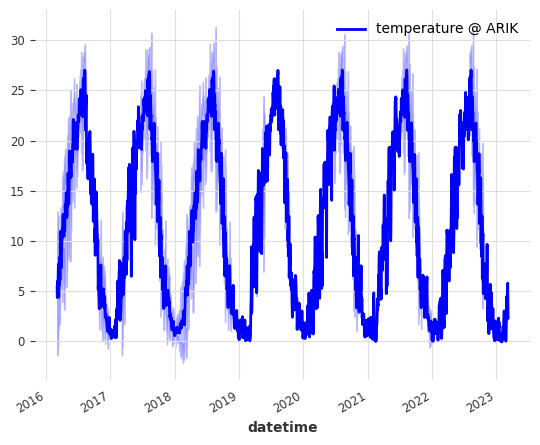

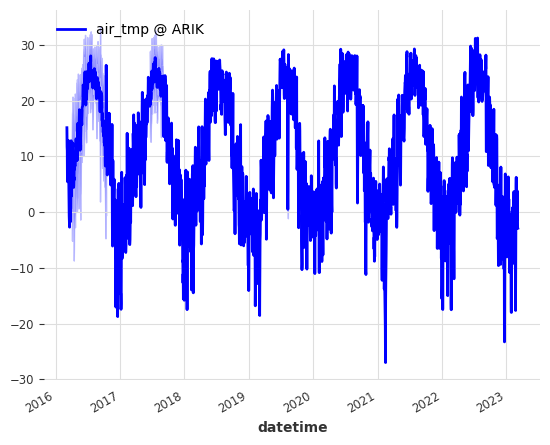

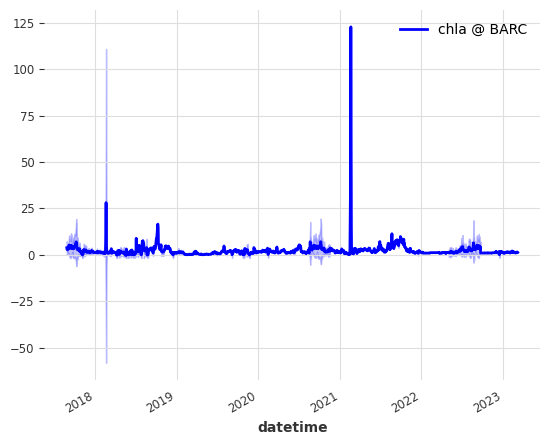

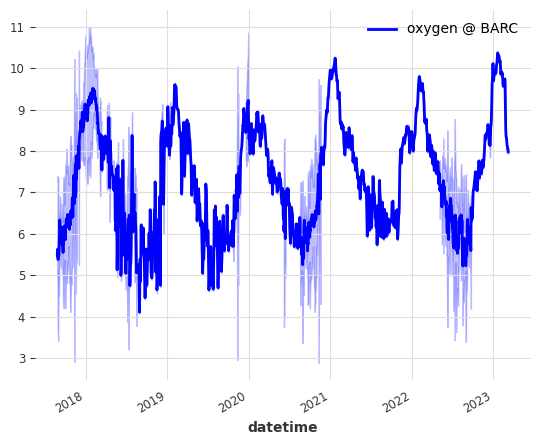

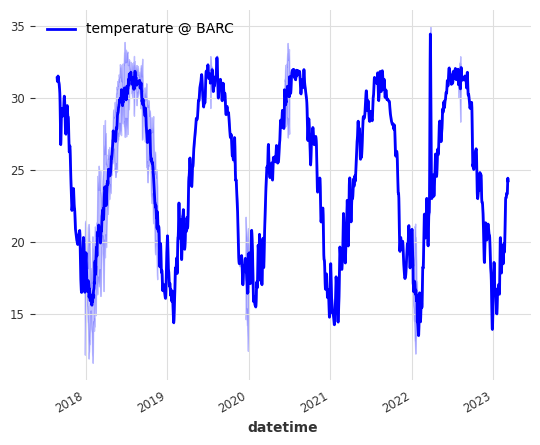

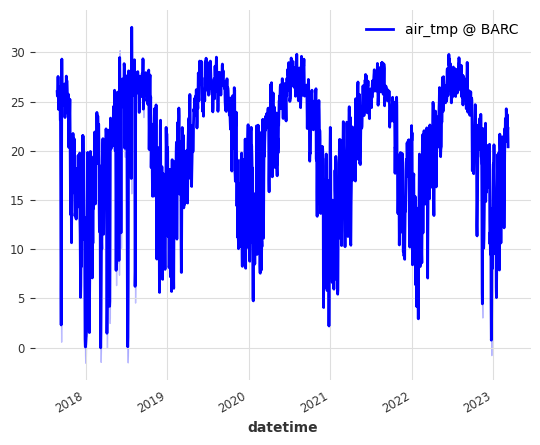

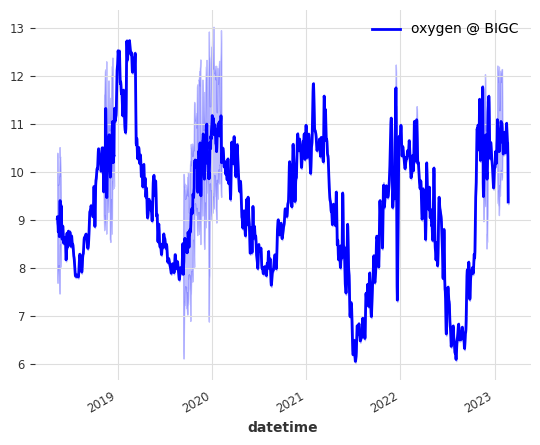

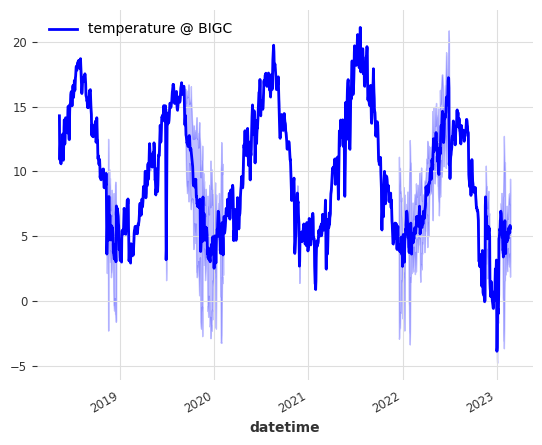

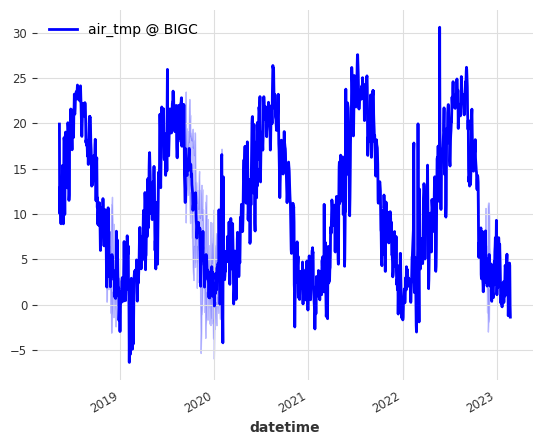

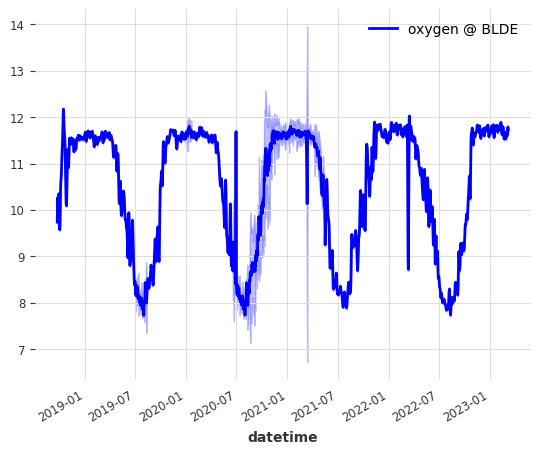

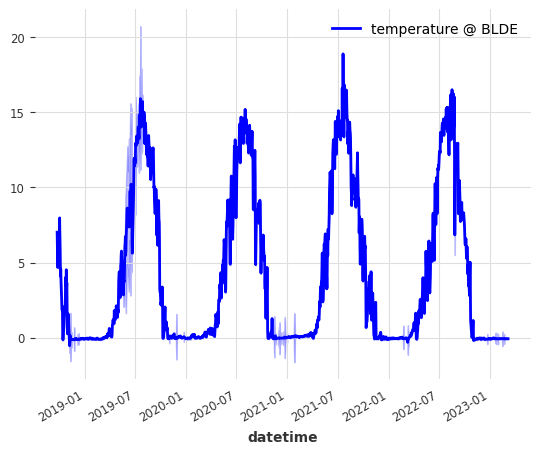

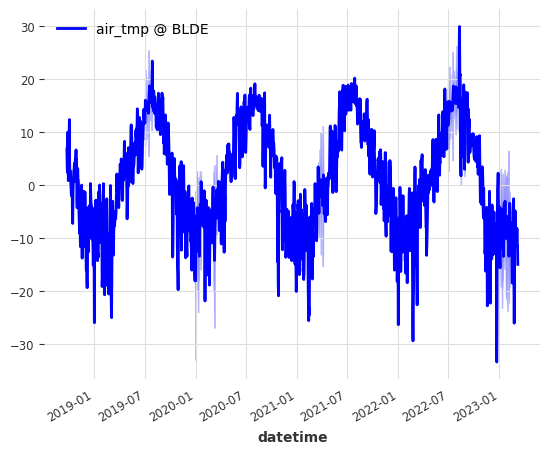

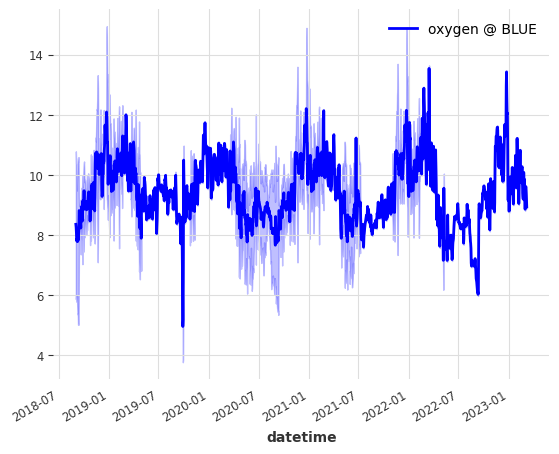

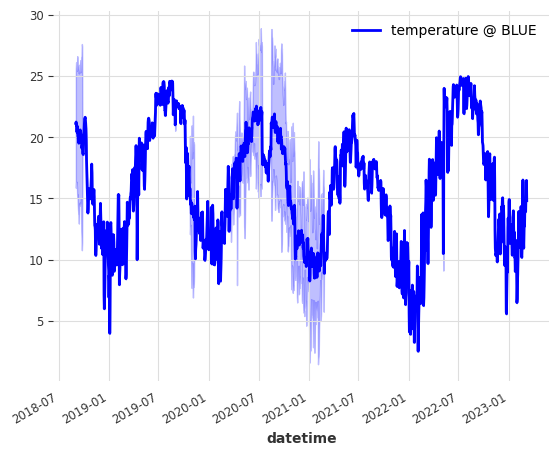

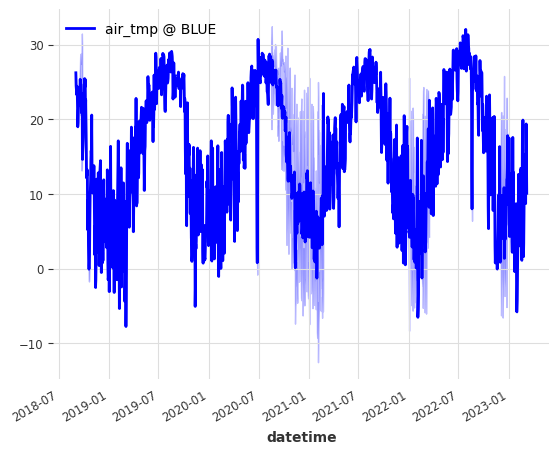

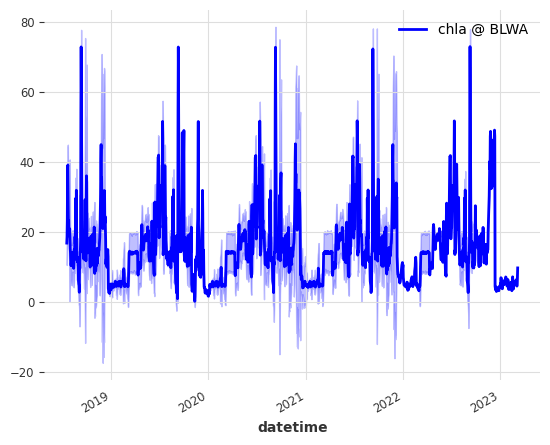

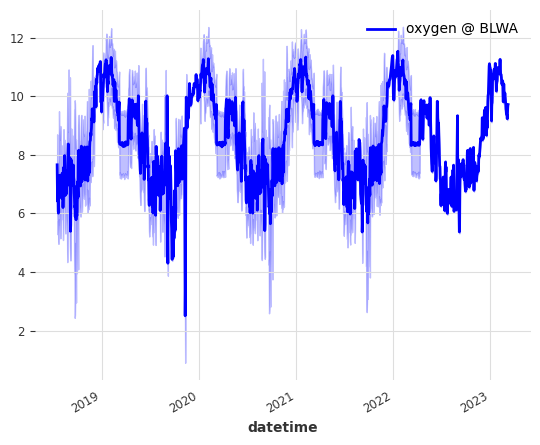

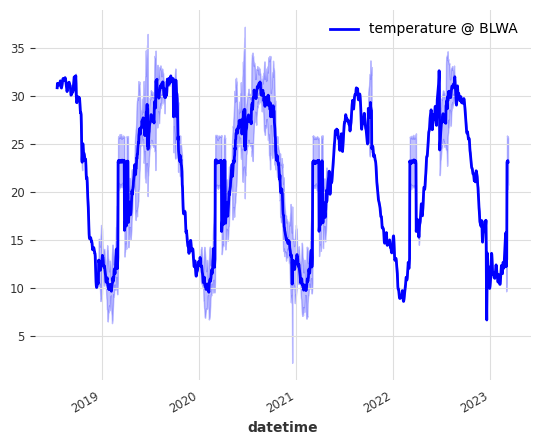

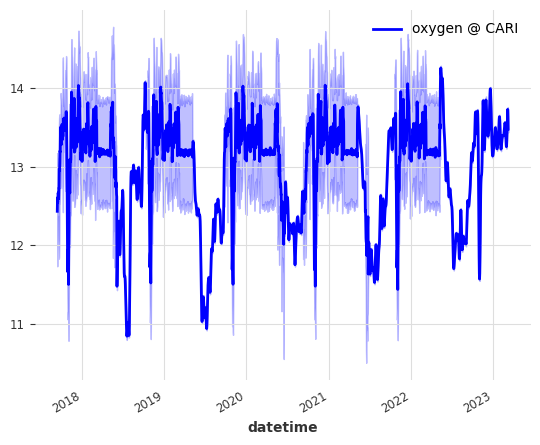

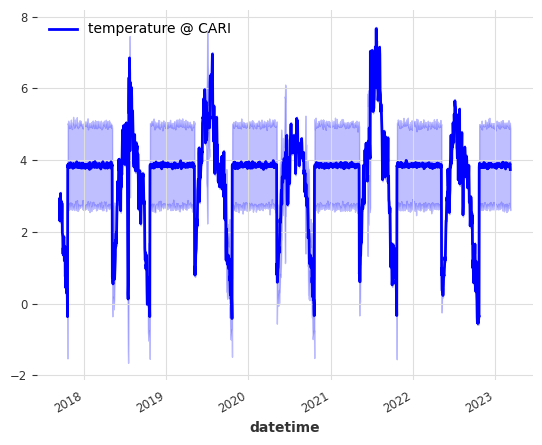

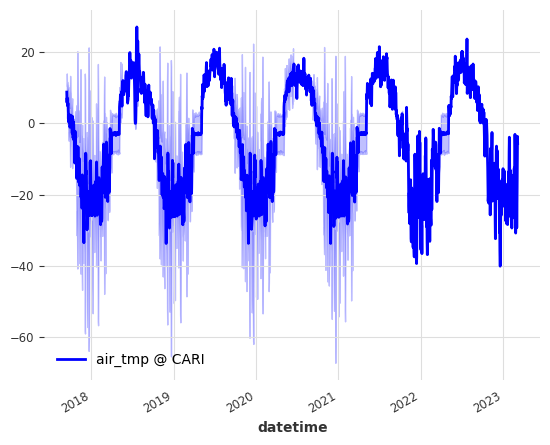

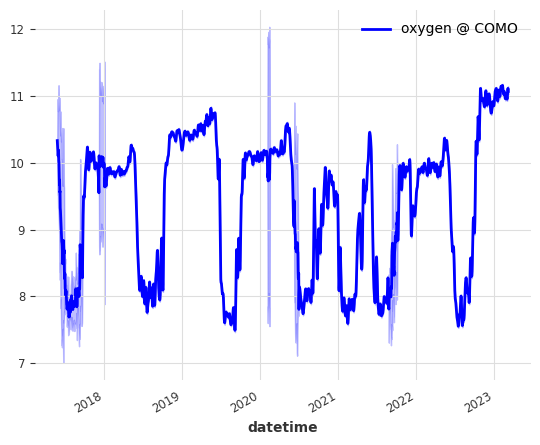

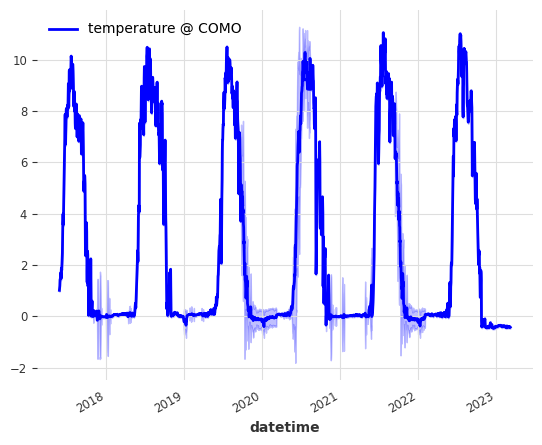

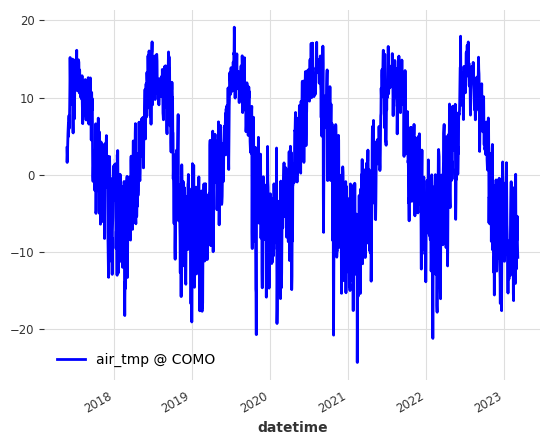

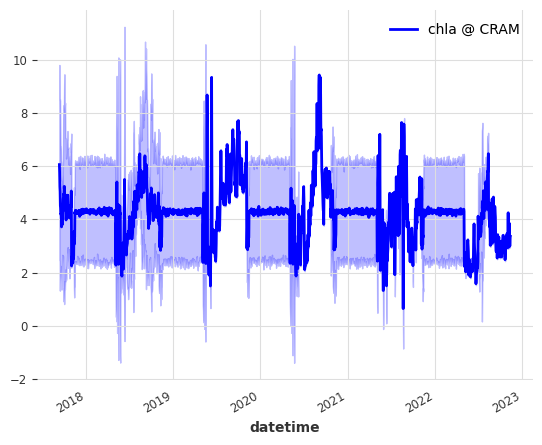

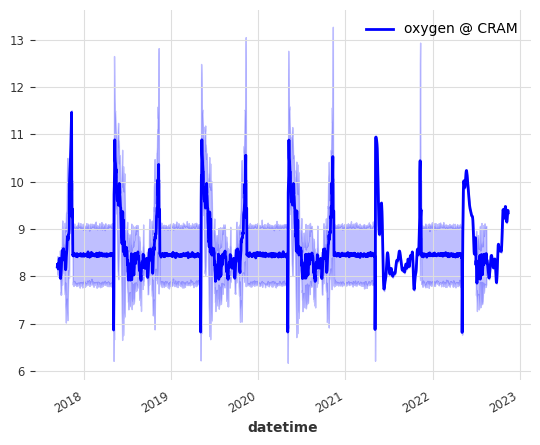

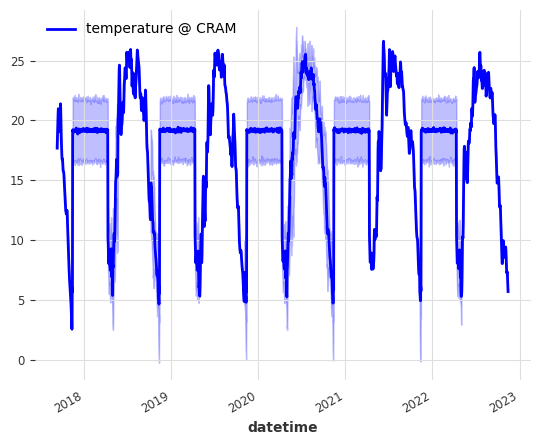

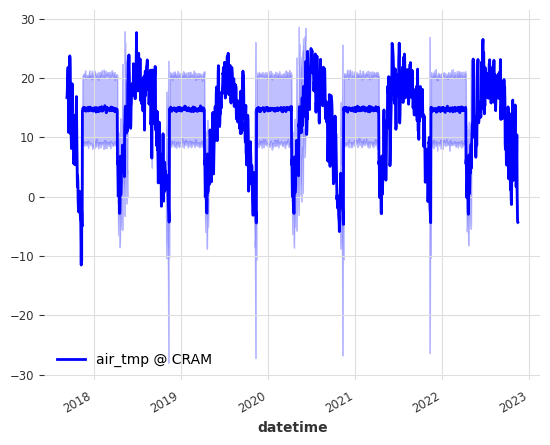

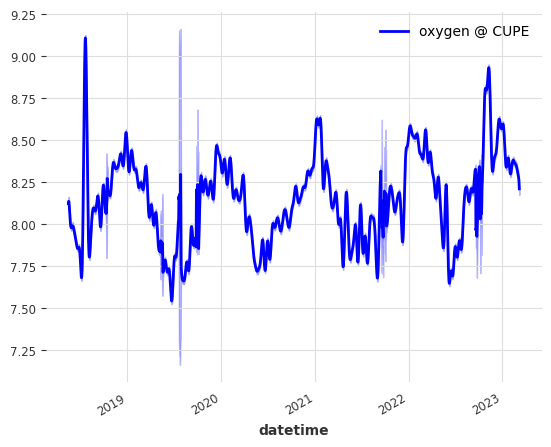

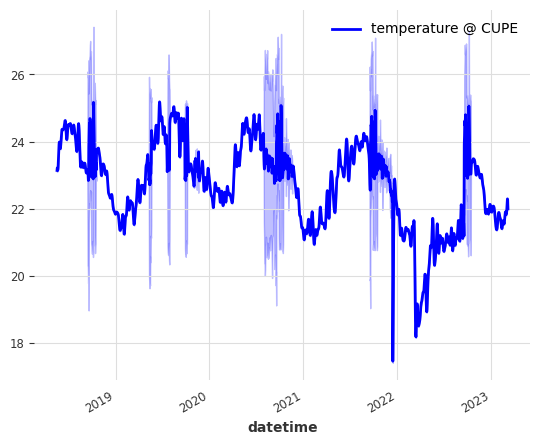

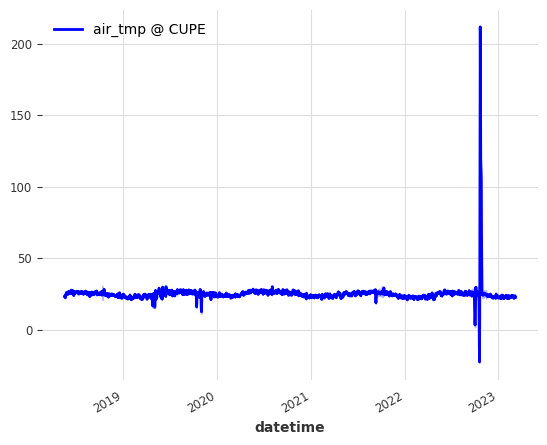

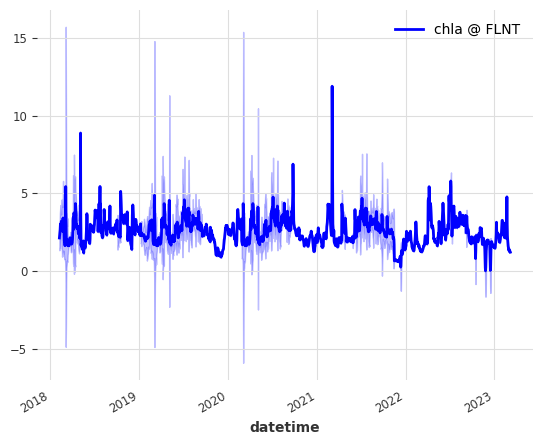

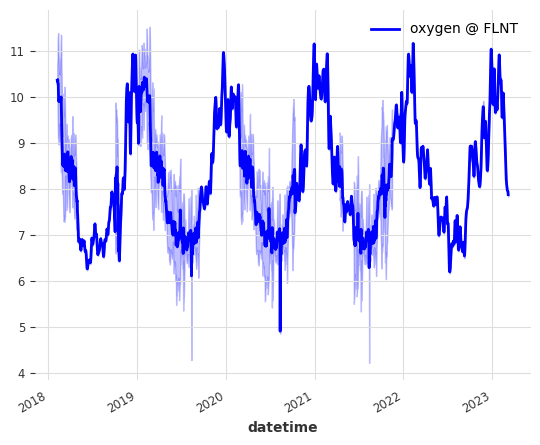

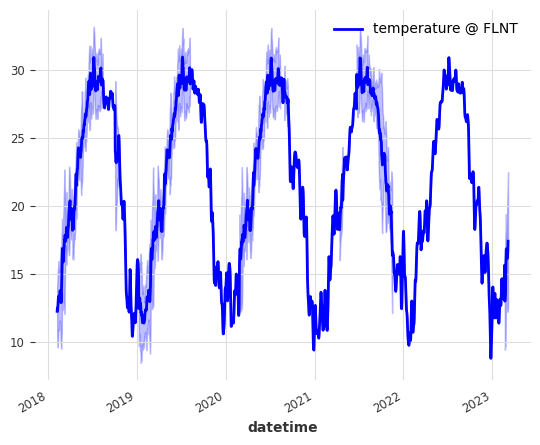

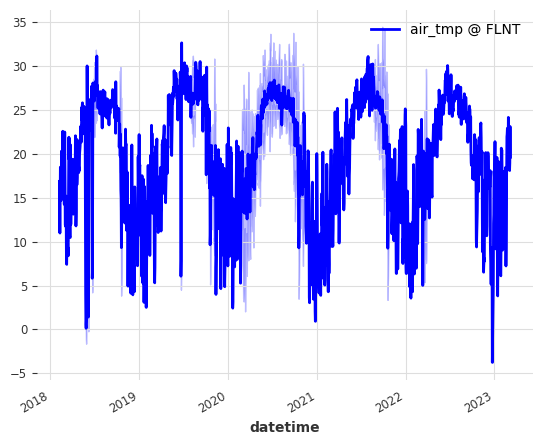

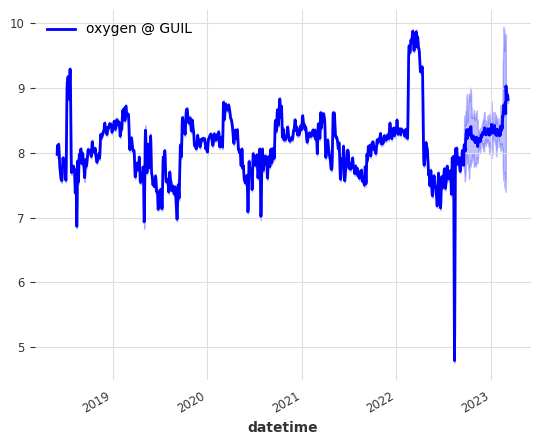

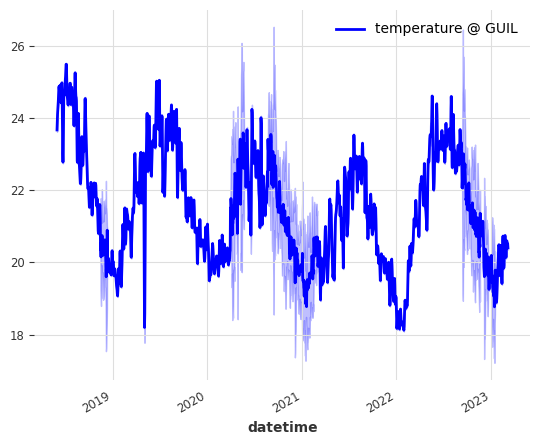

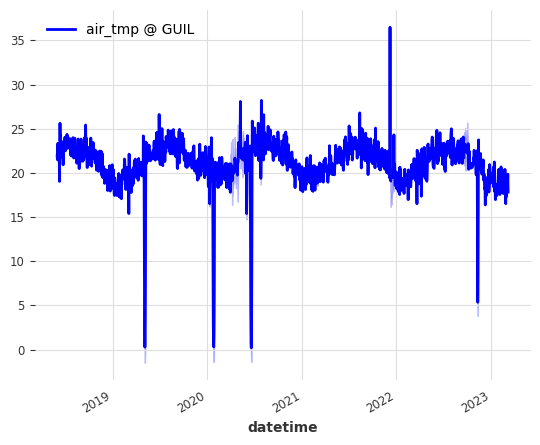

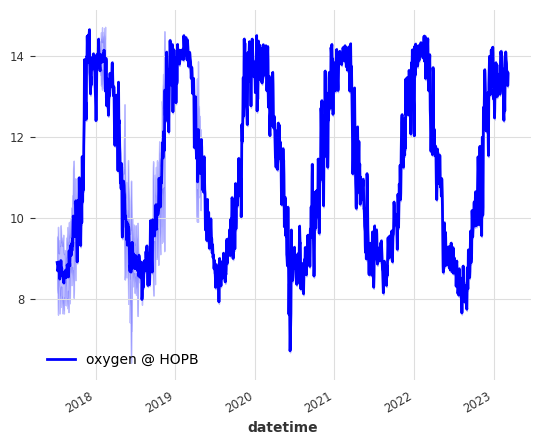

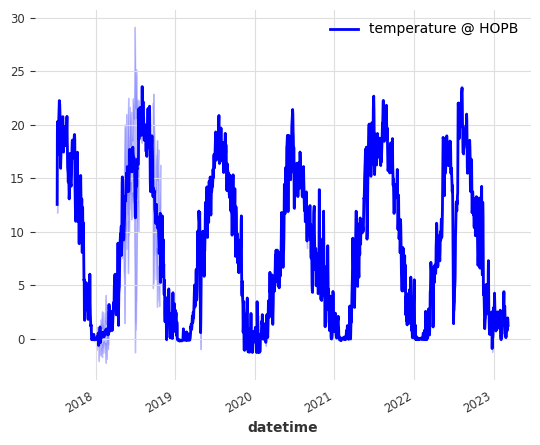

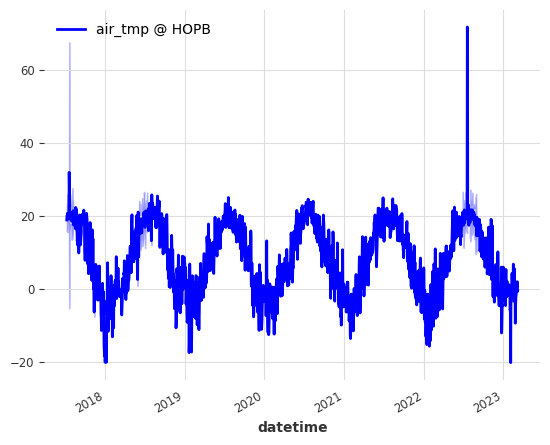

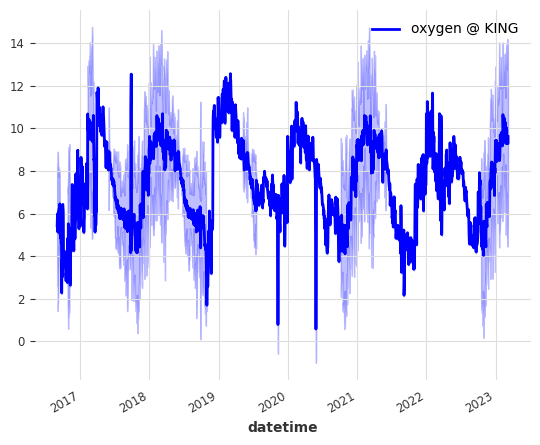

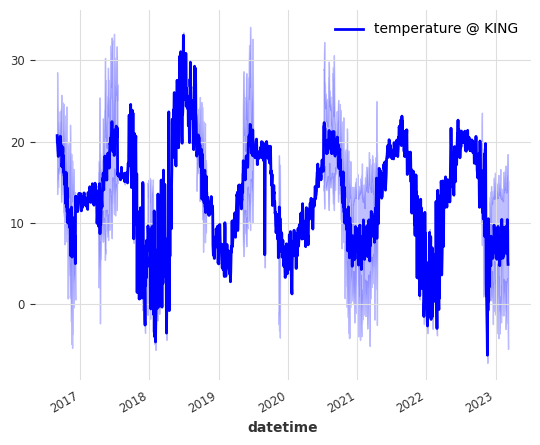

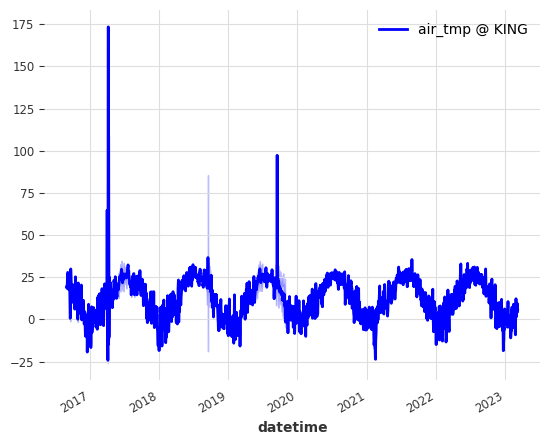

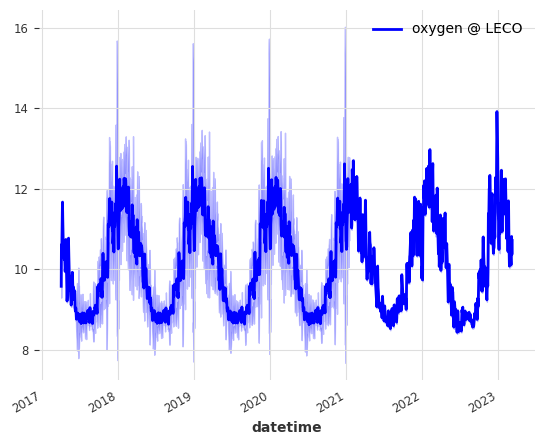

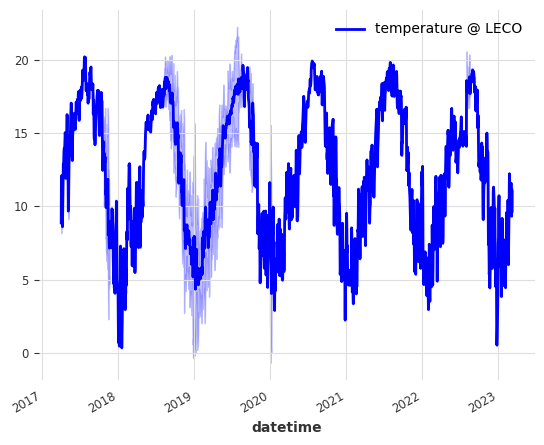

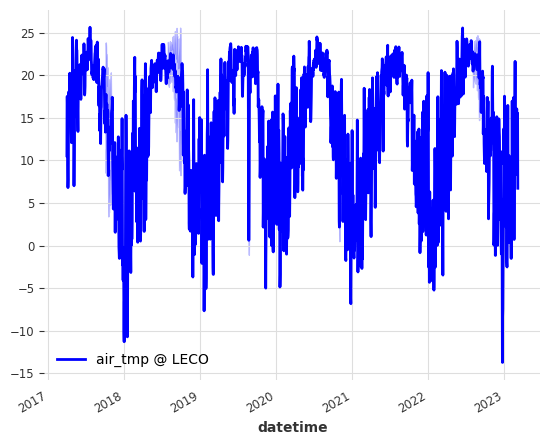

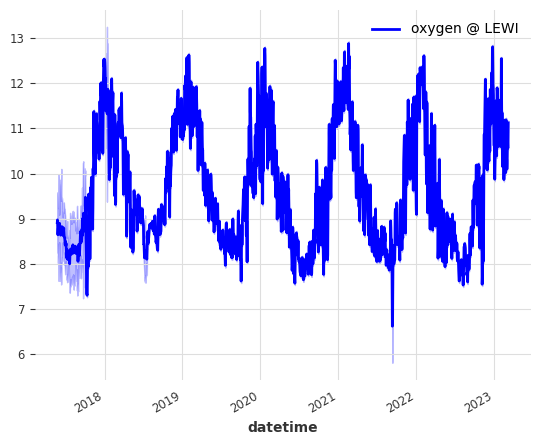

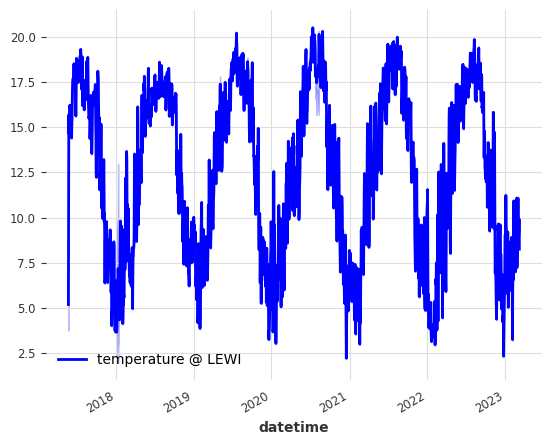

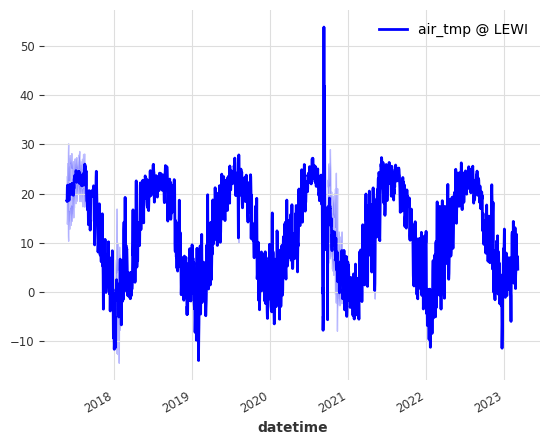

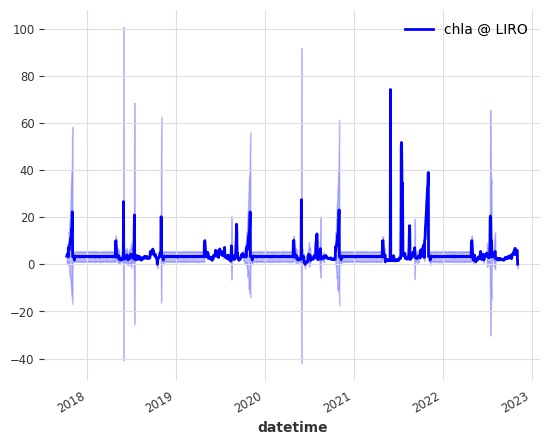

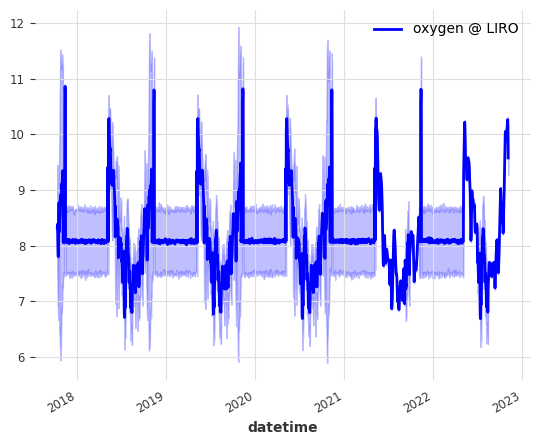

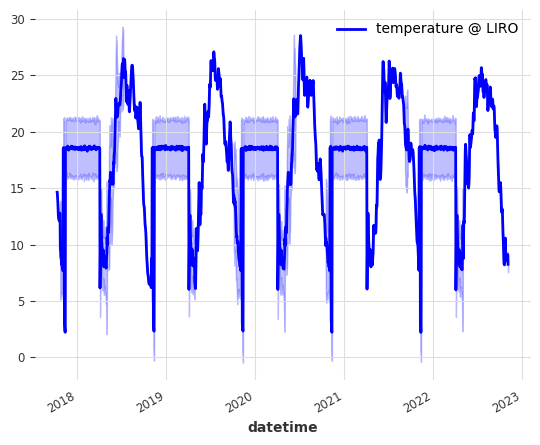

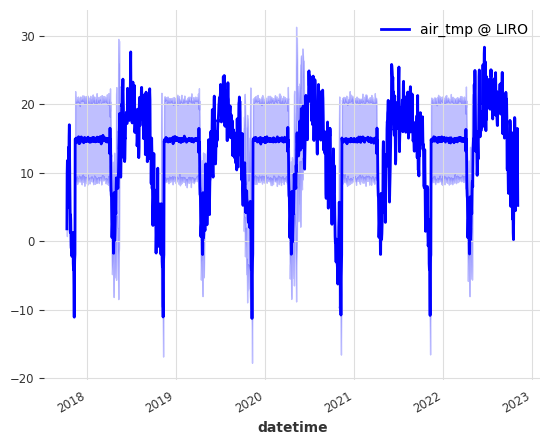

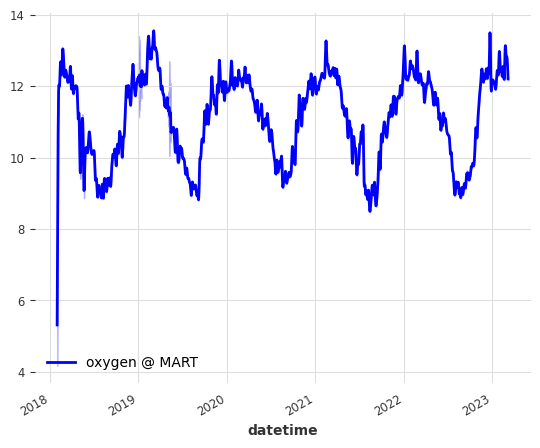

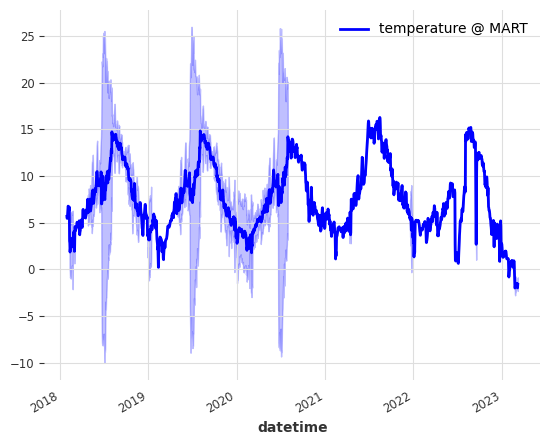

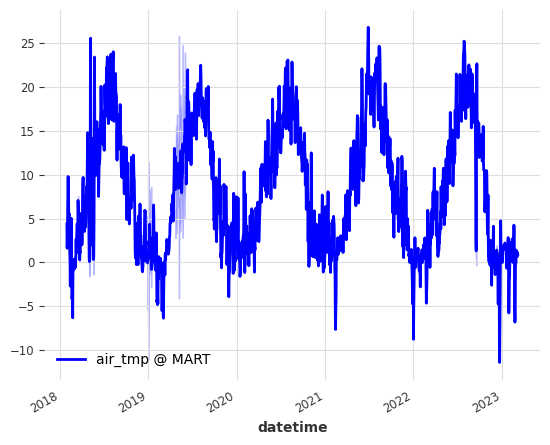

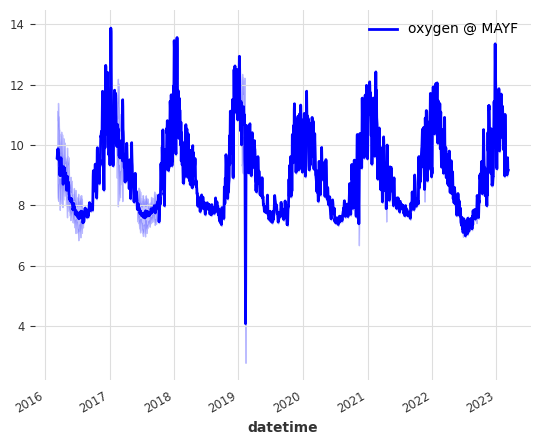

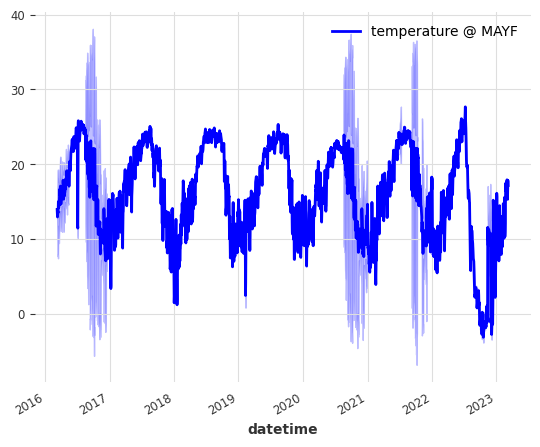

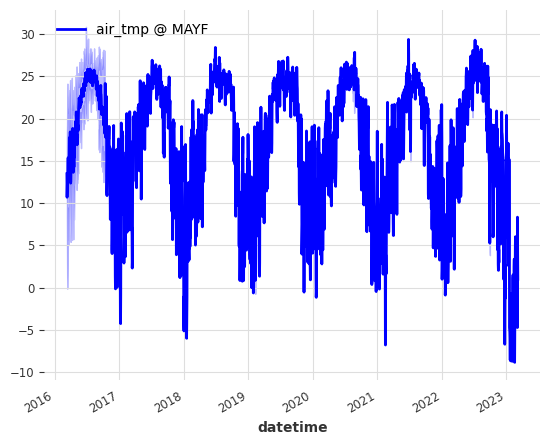

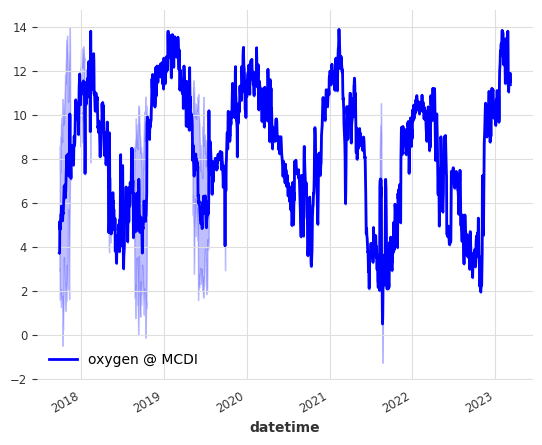

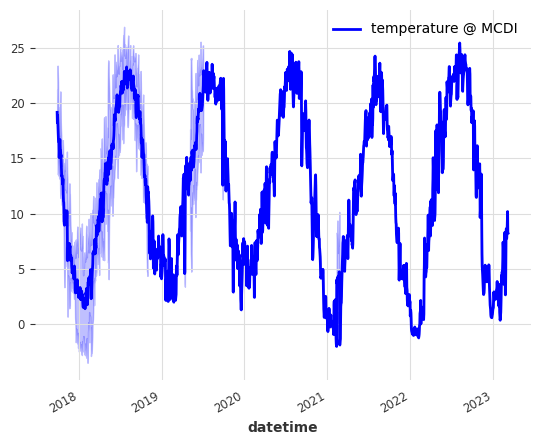

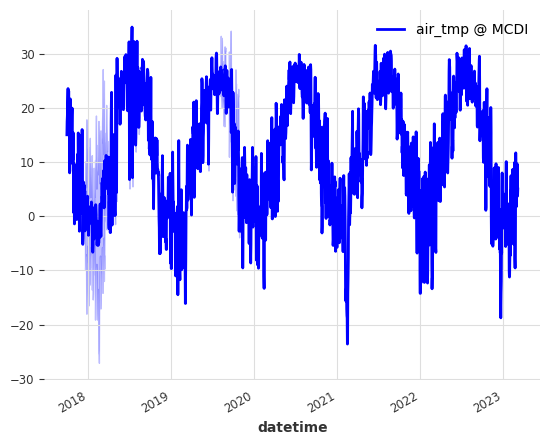

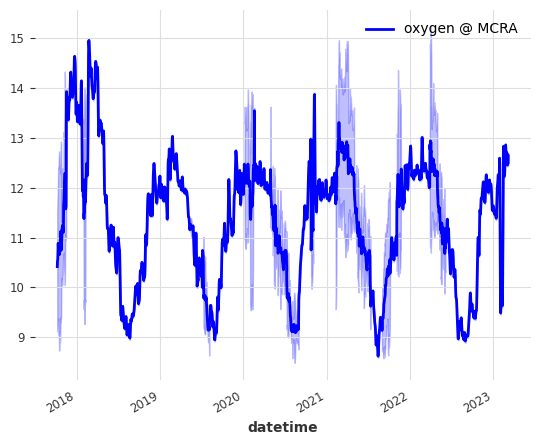

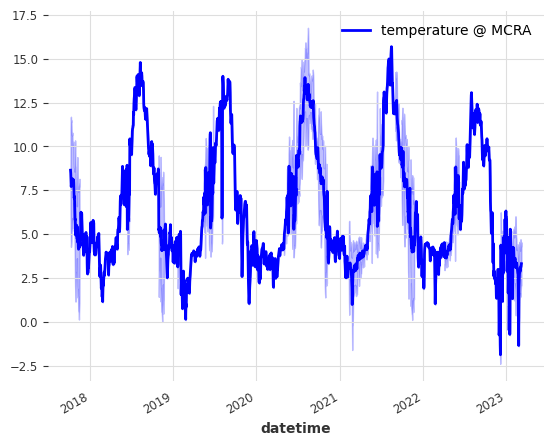

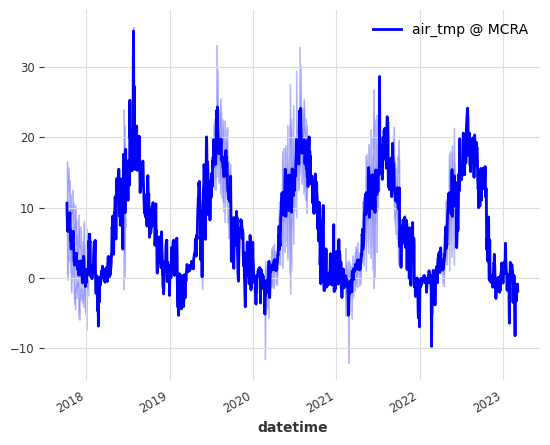

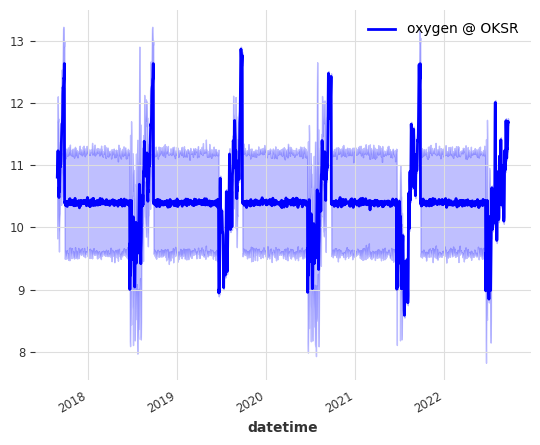

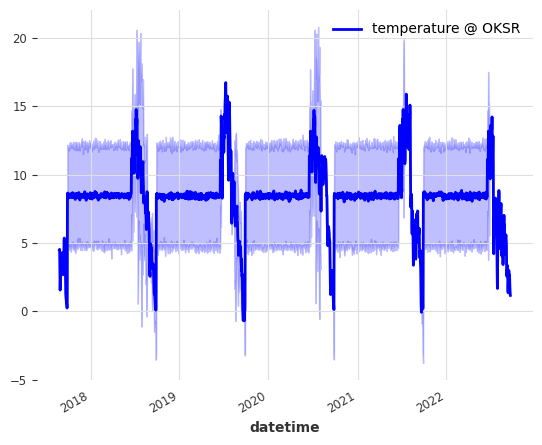

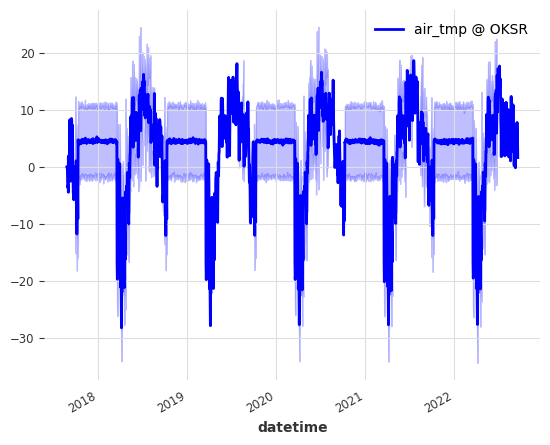

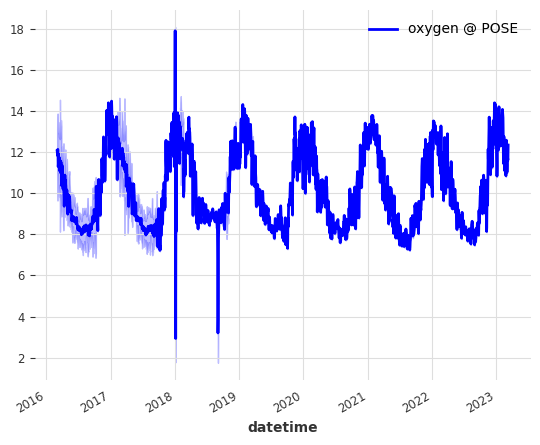

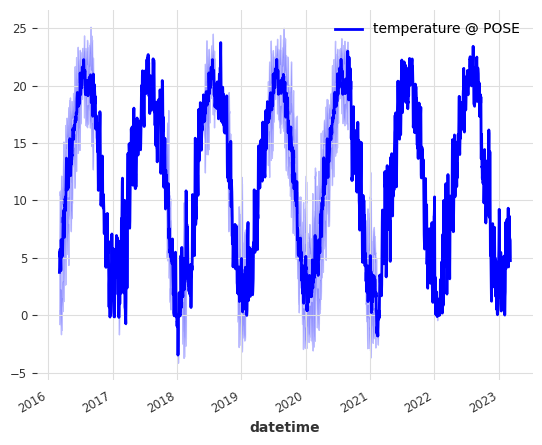

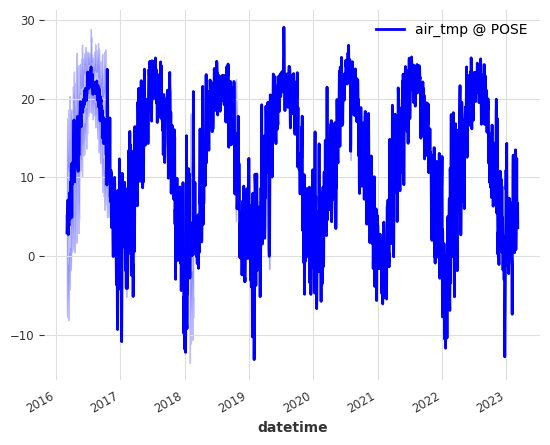

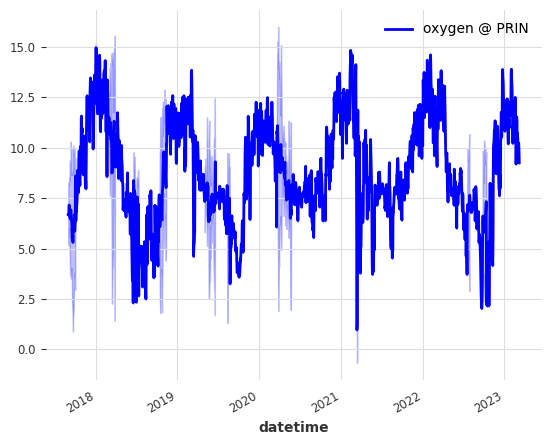

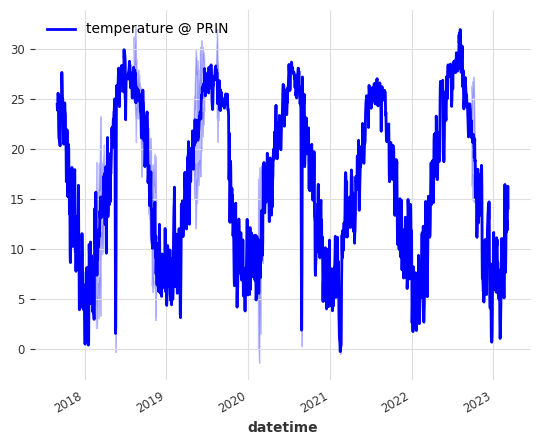

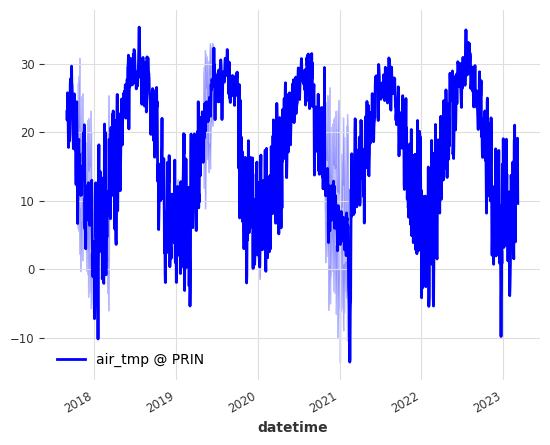

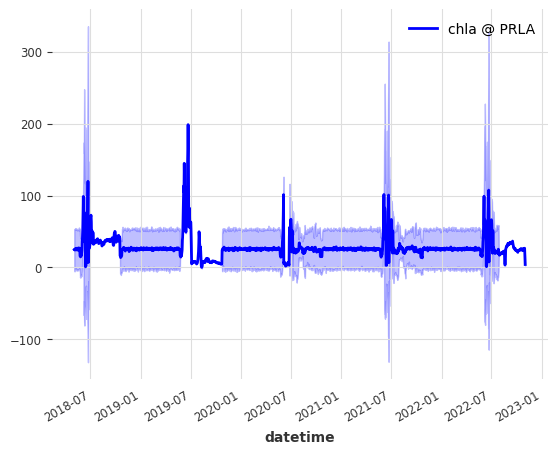

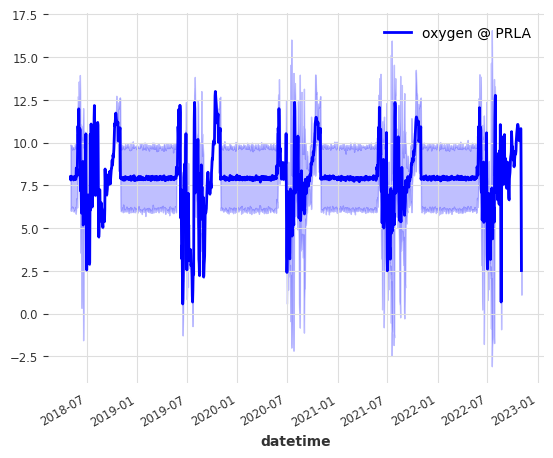

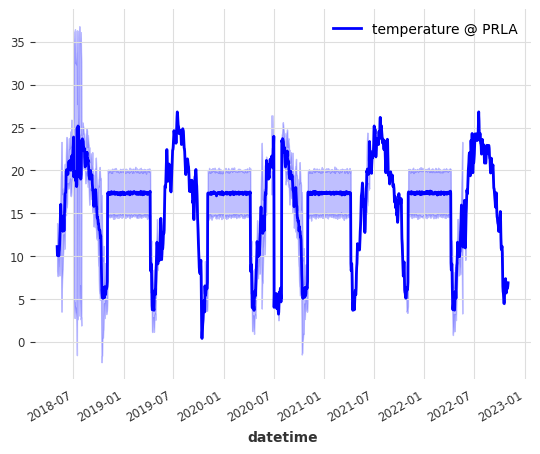

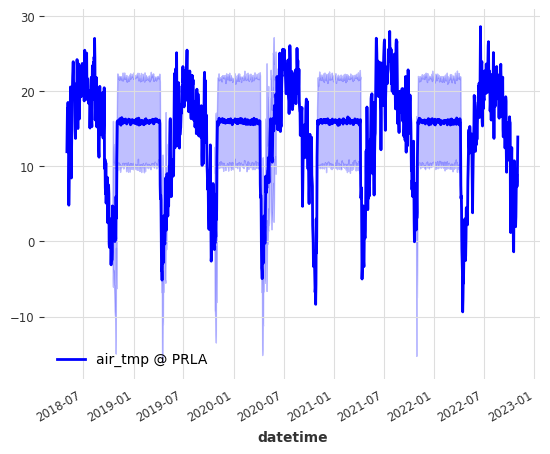

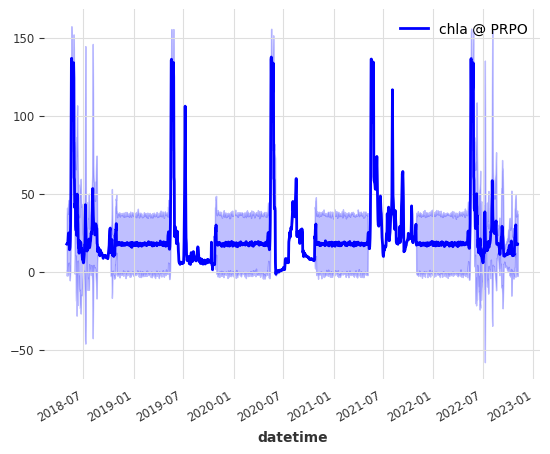

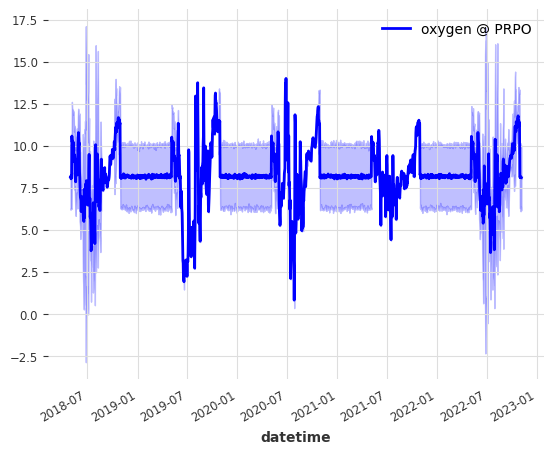

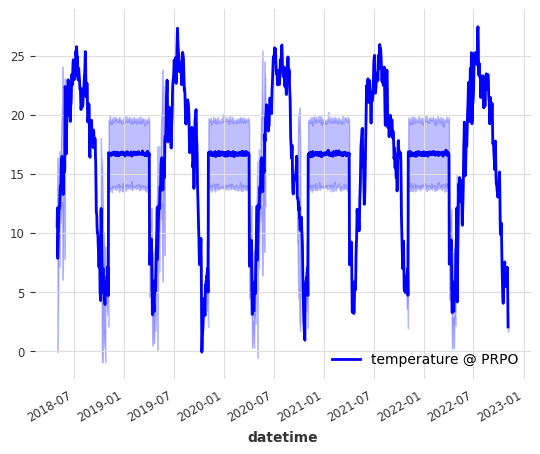

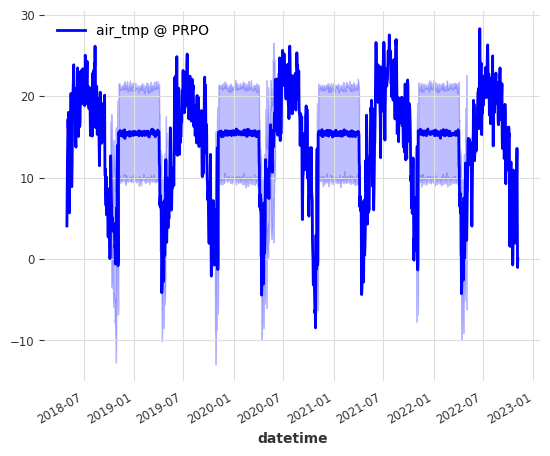

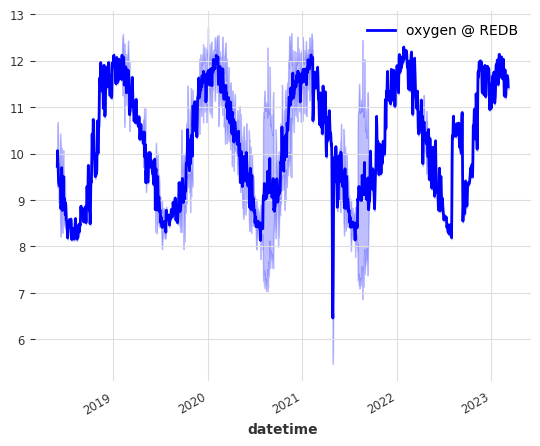

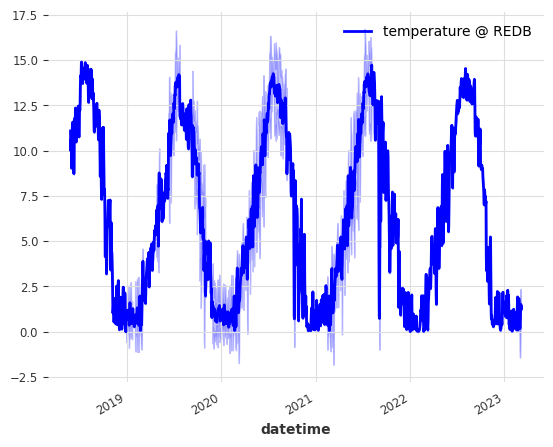

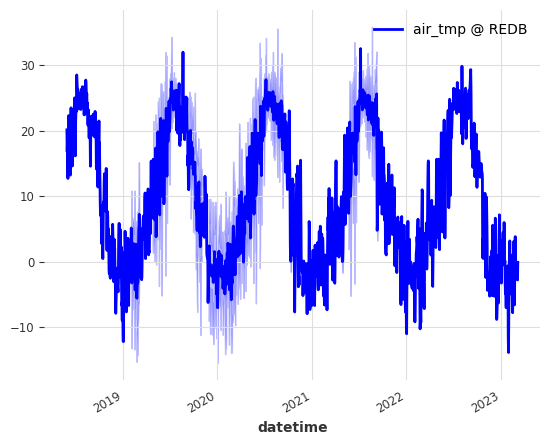

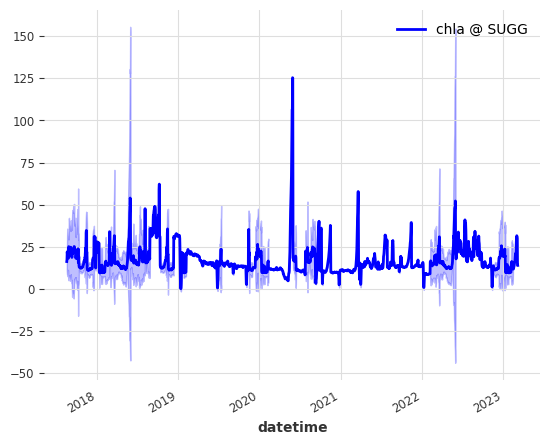

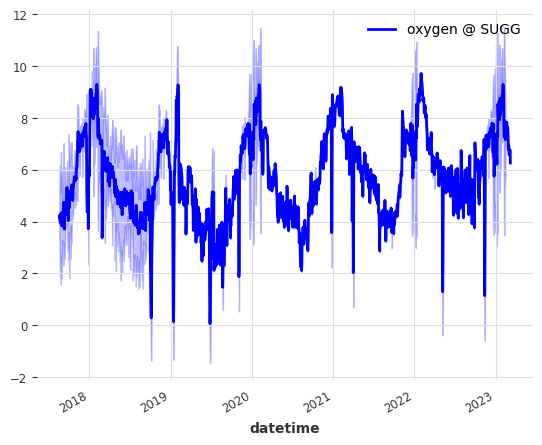

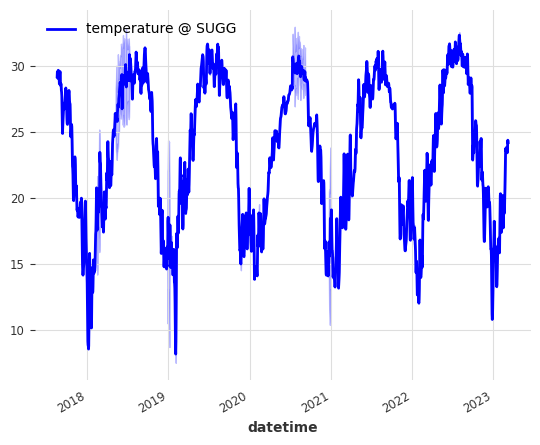

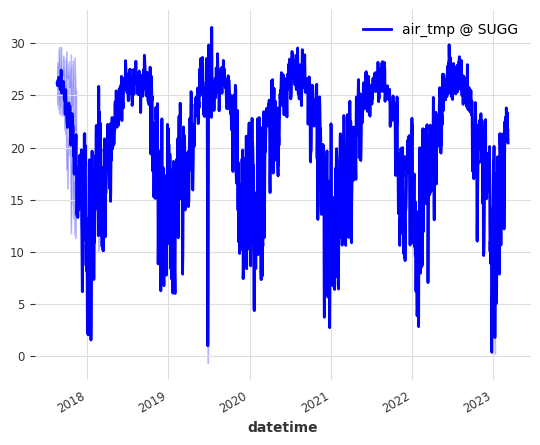

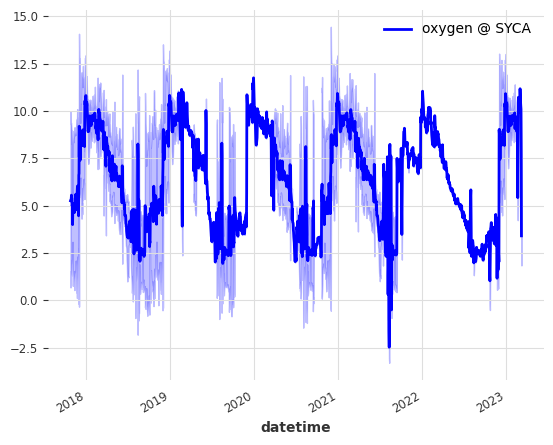

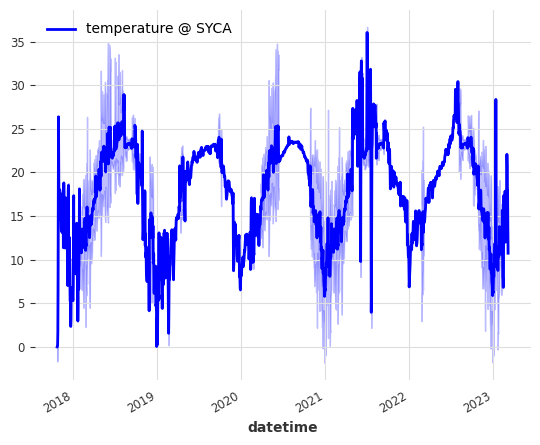

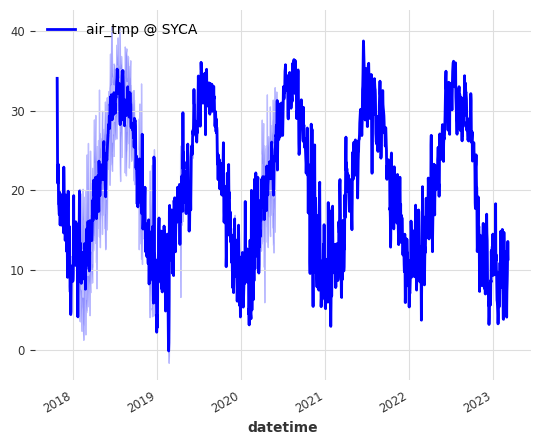

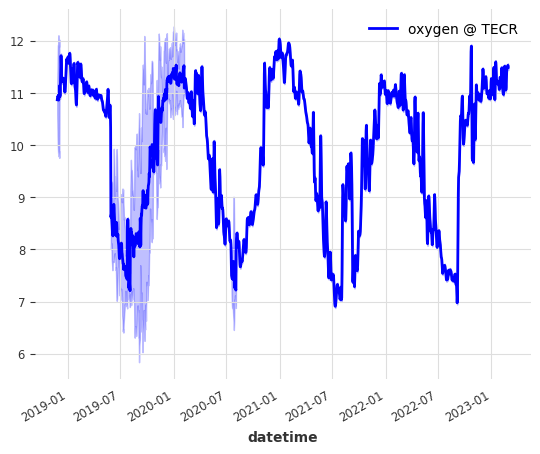

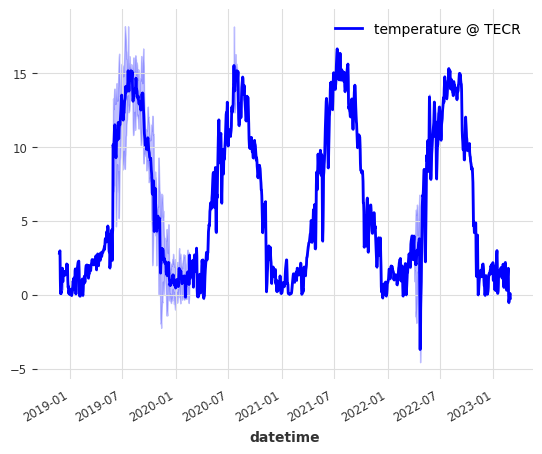

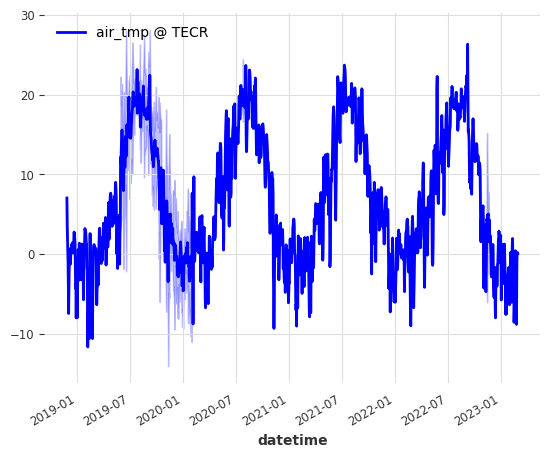

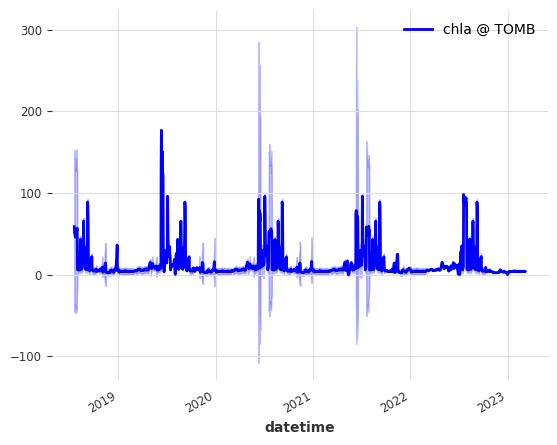

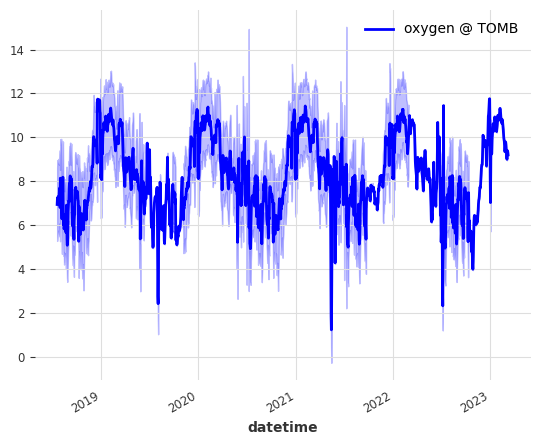

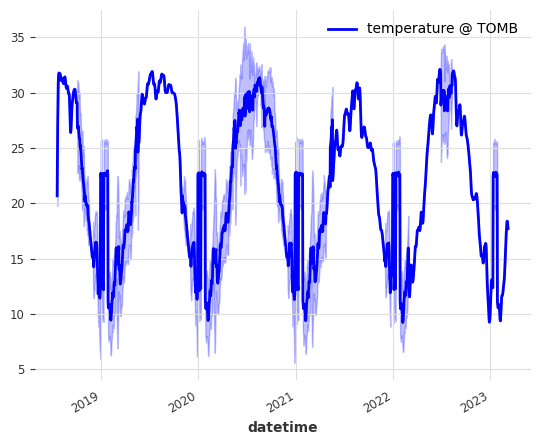

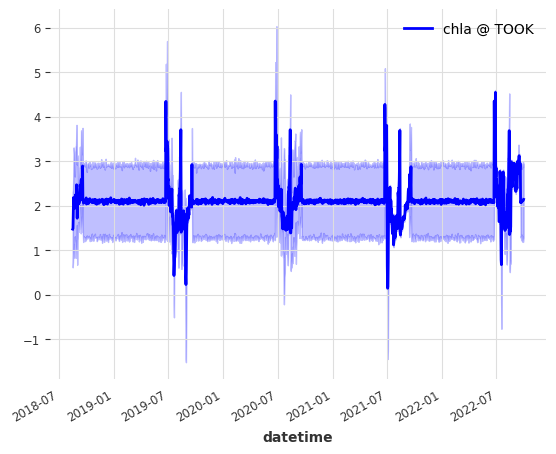

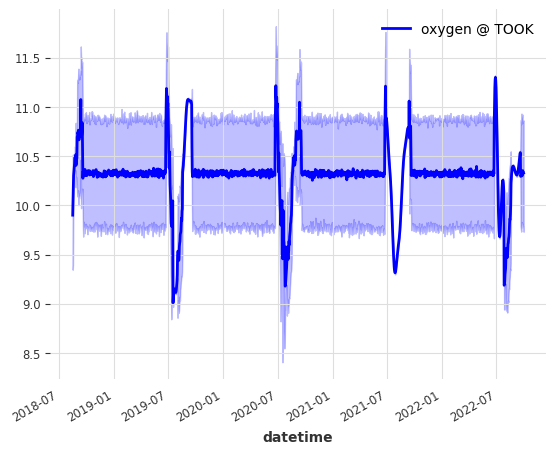

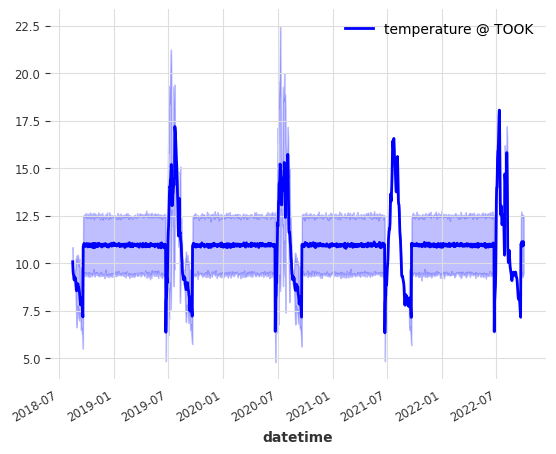

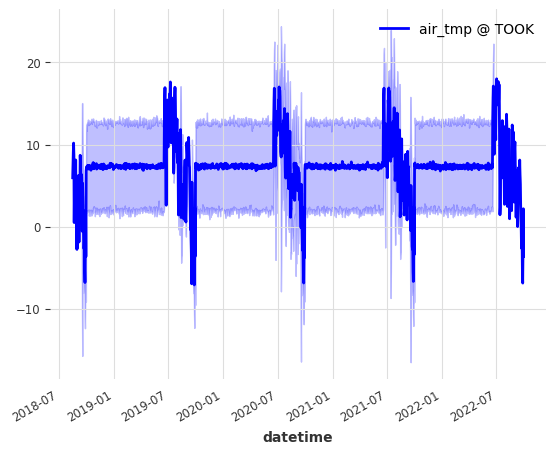

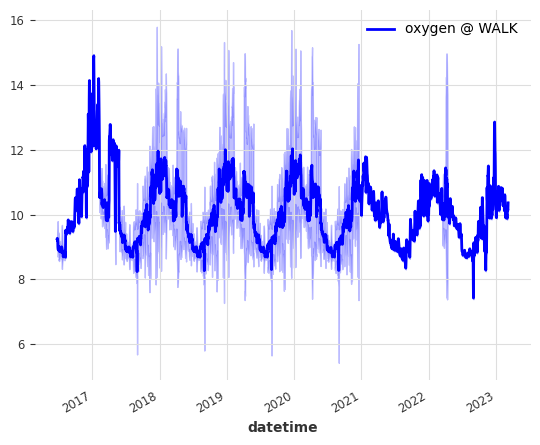

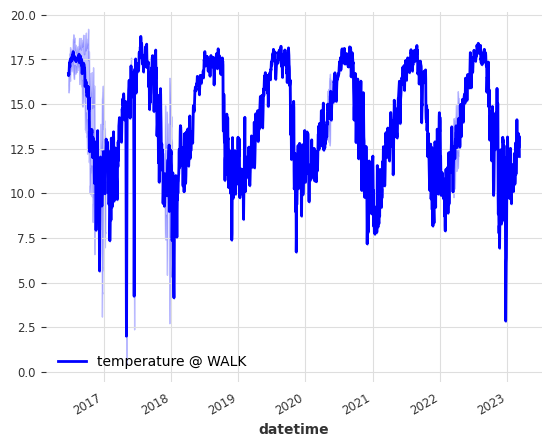

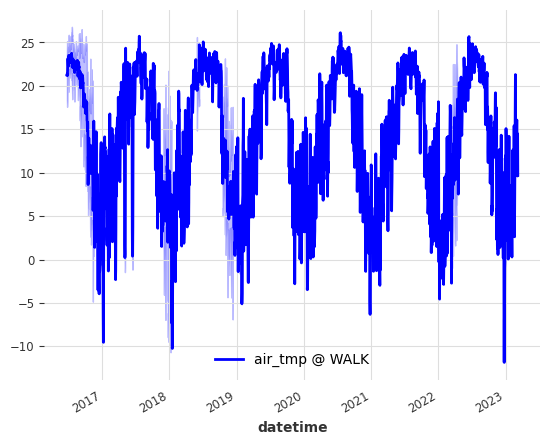

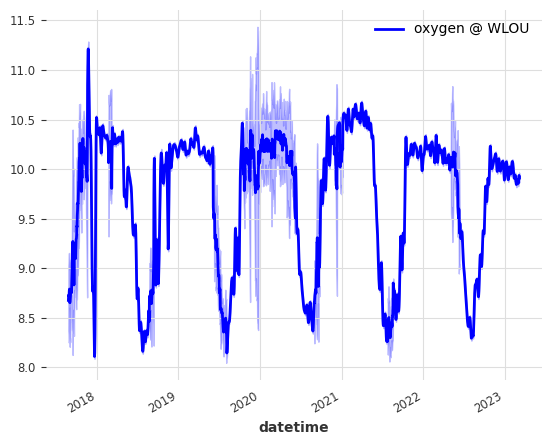

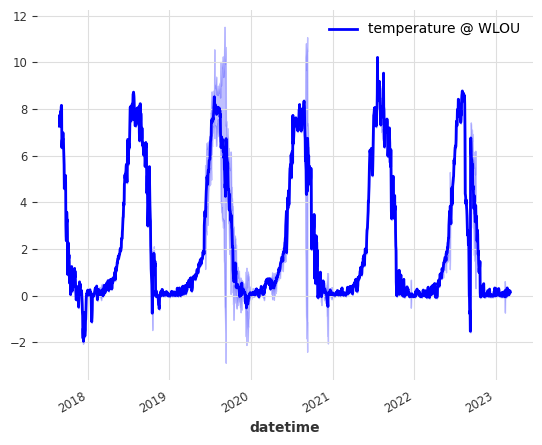

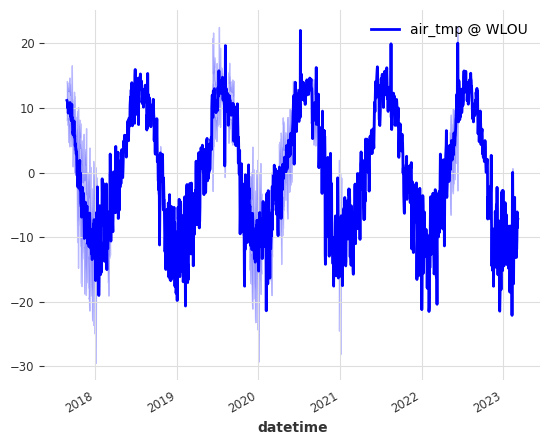

In [6]:
for site in targets.site_id.unique():
    data_preprocessor.plot_by_site(site)

In [ ]:
data_preprocessor.save()

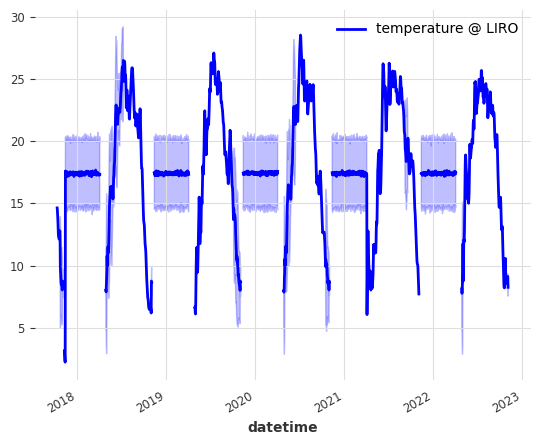

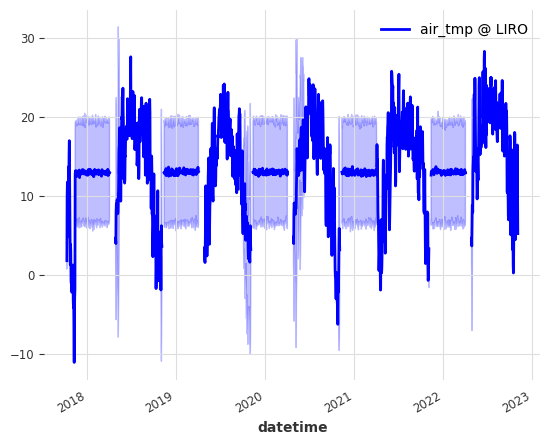

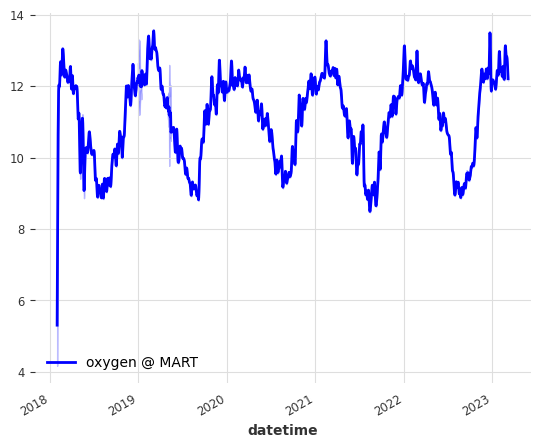

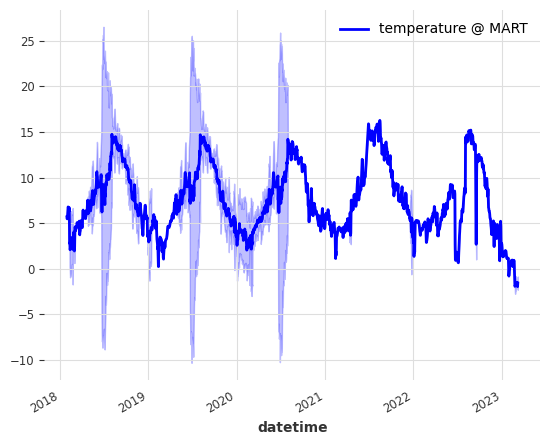

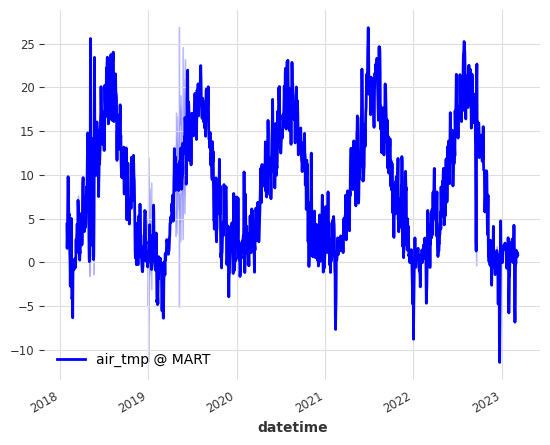

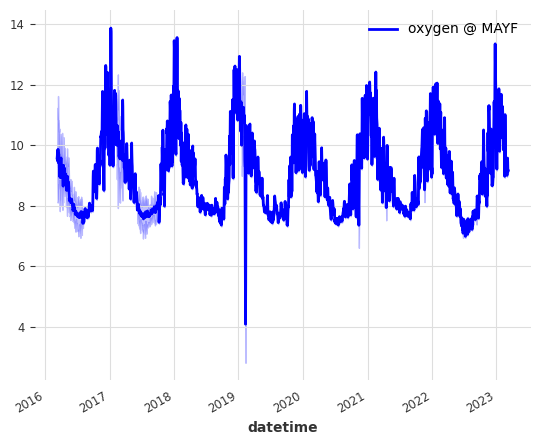

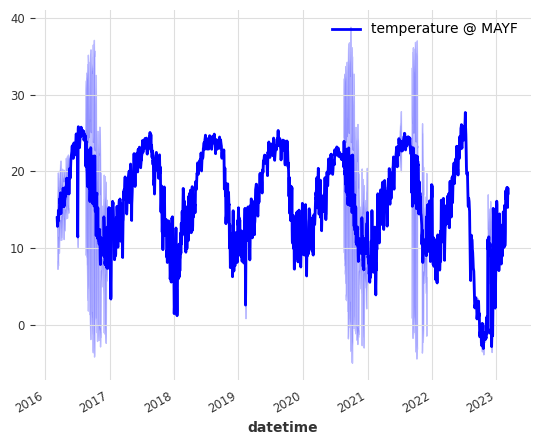

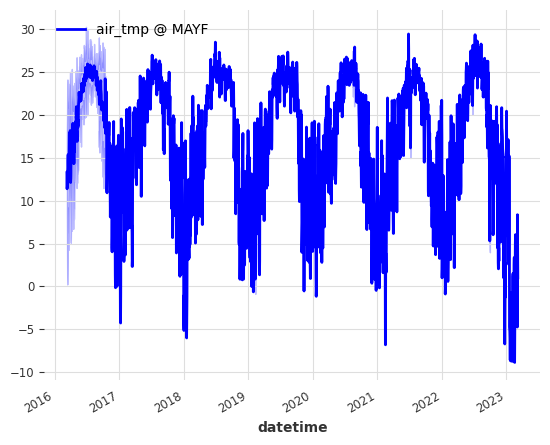

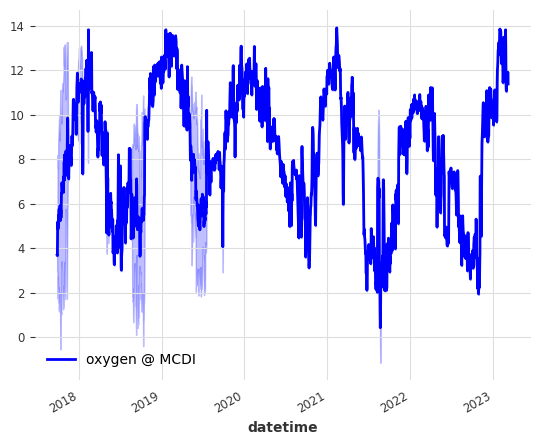

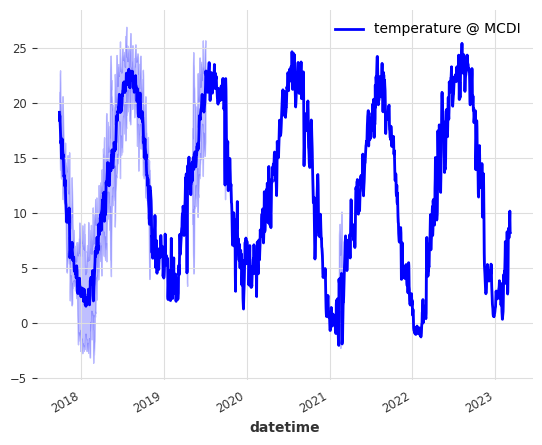

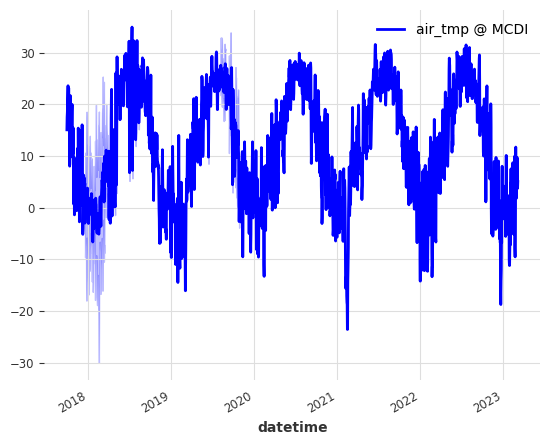

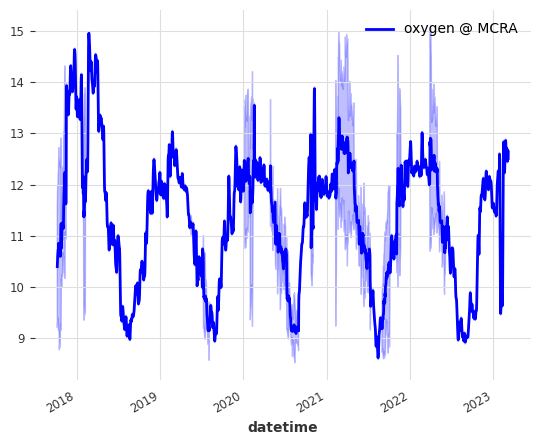

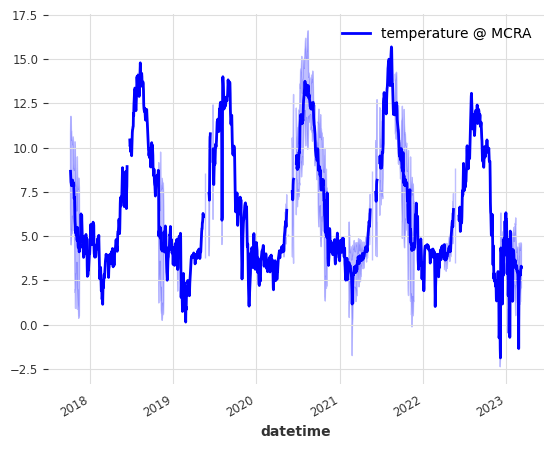

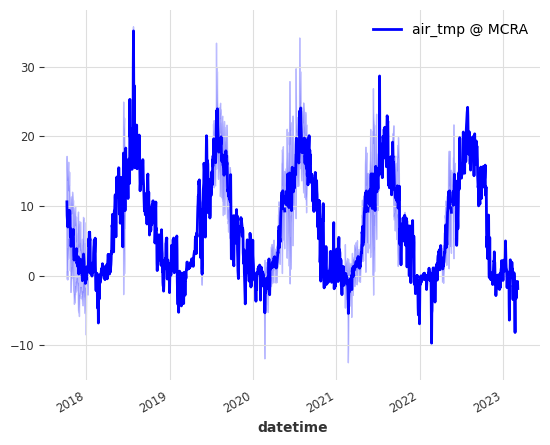

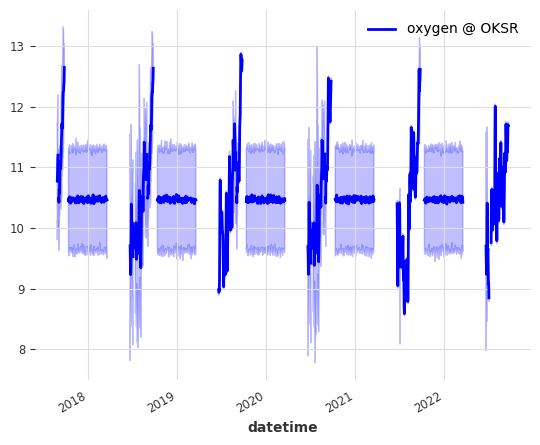

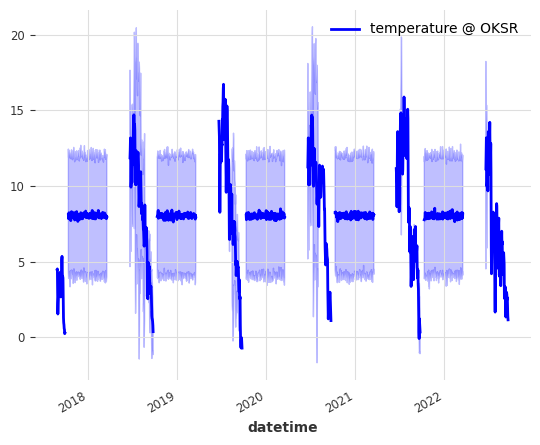

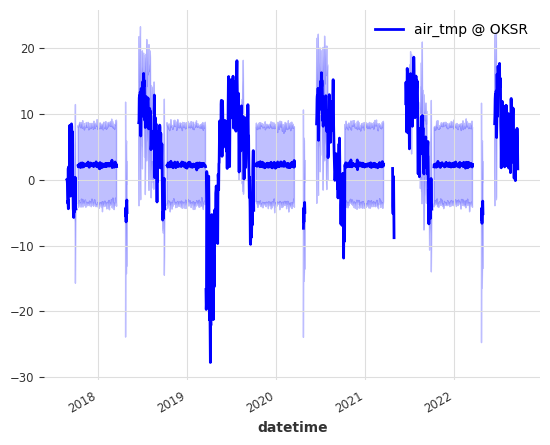

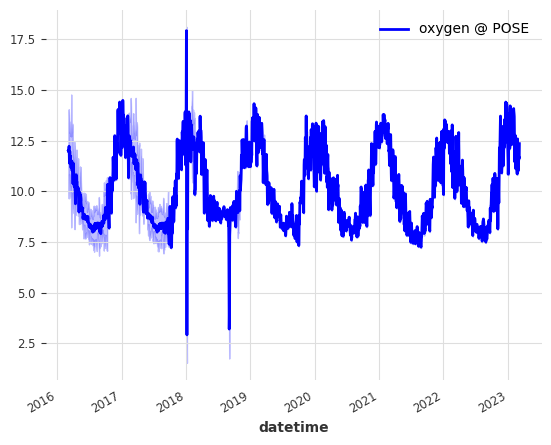

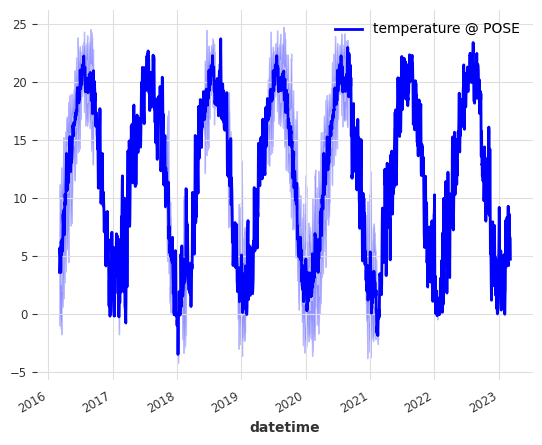

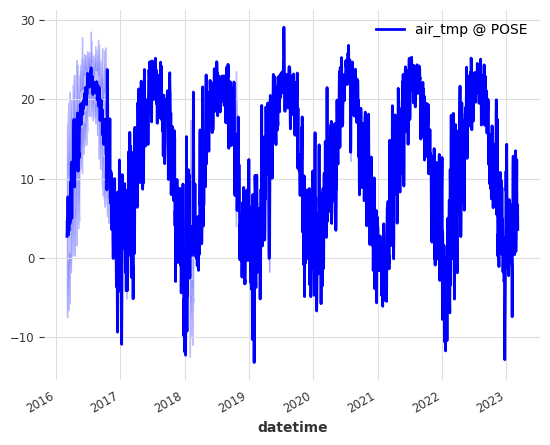

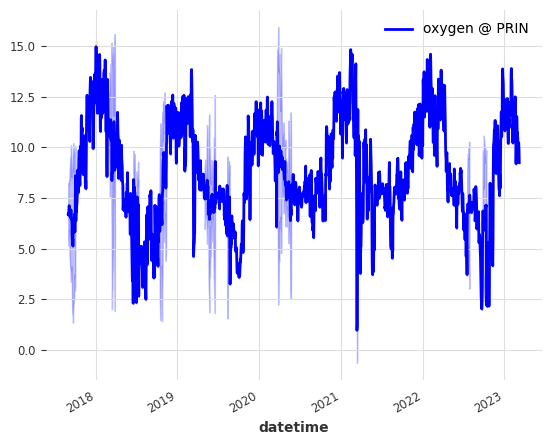

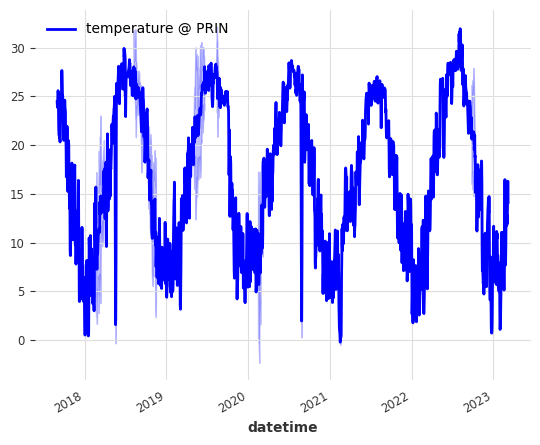

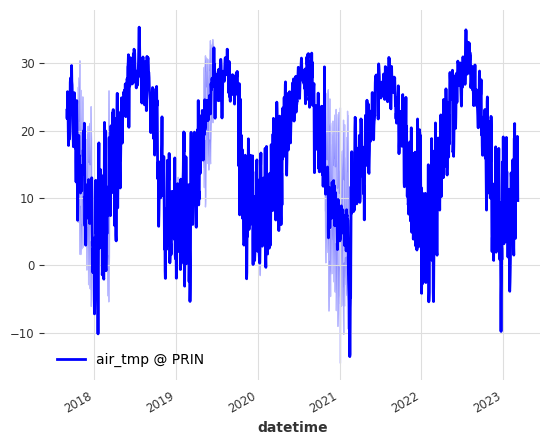

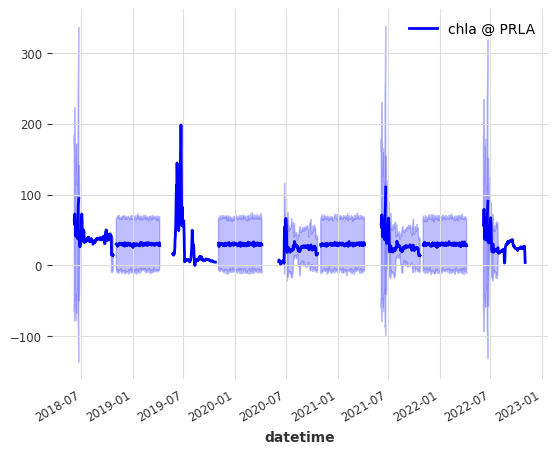

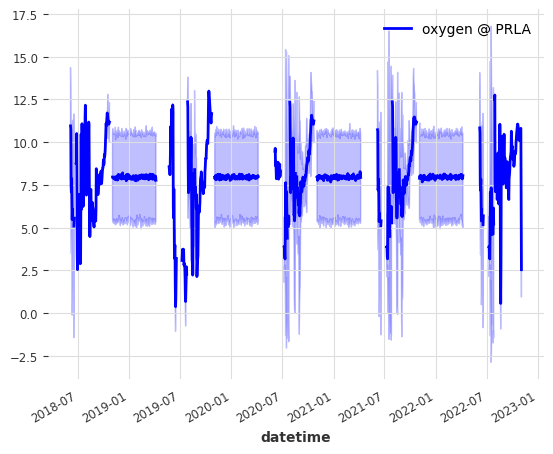

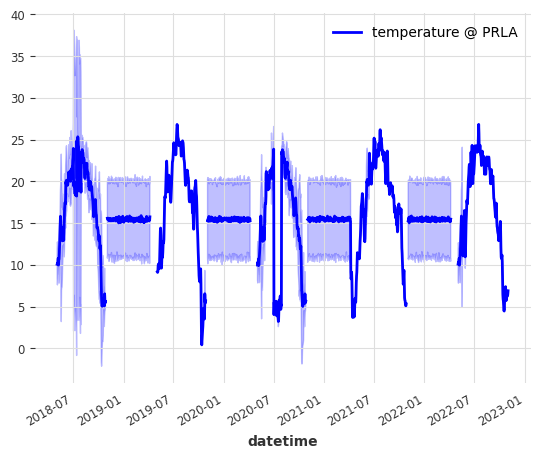

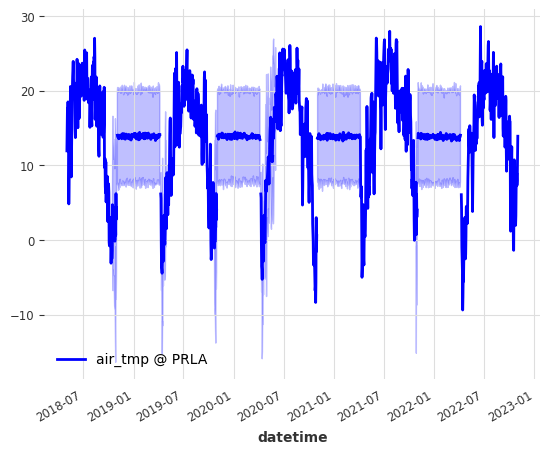

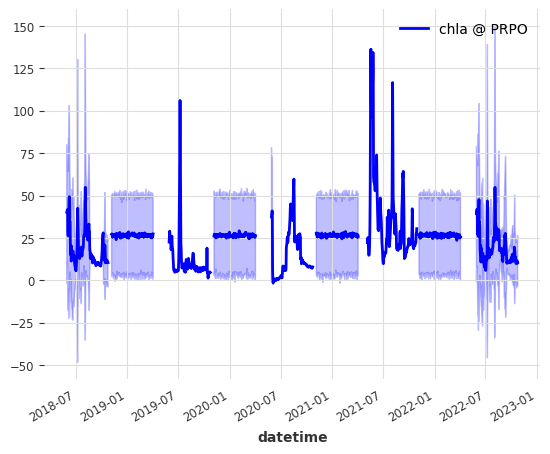

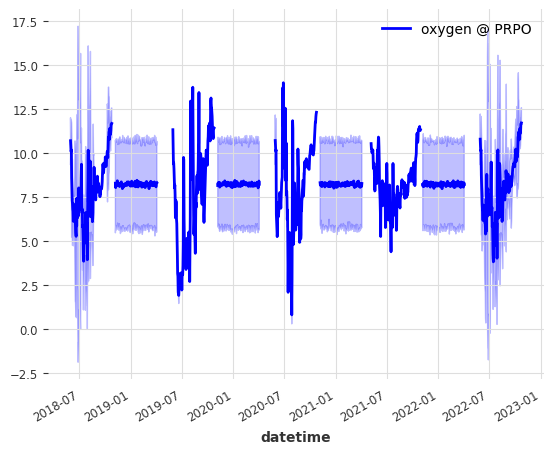

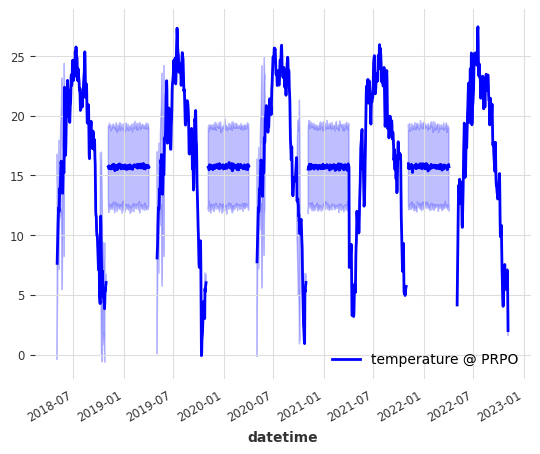

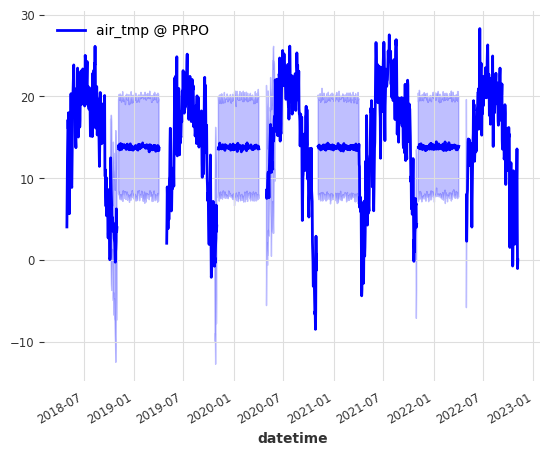

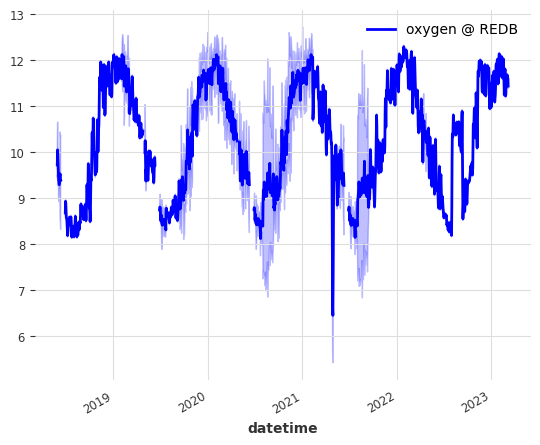

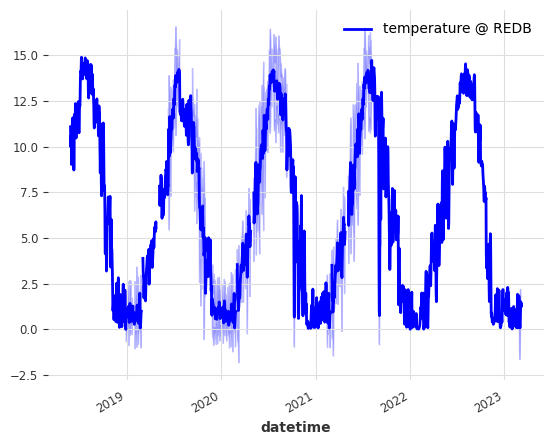

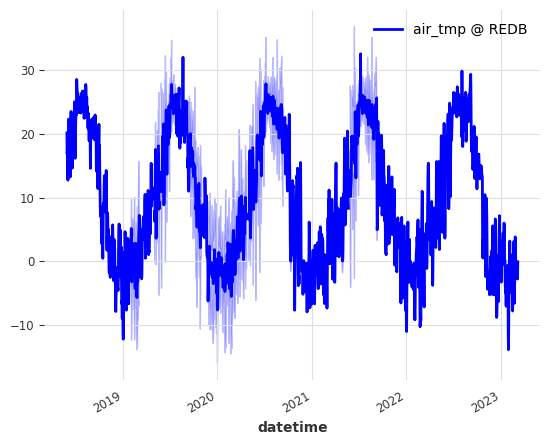

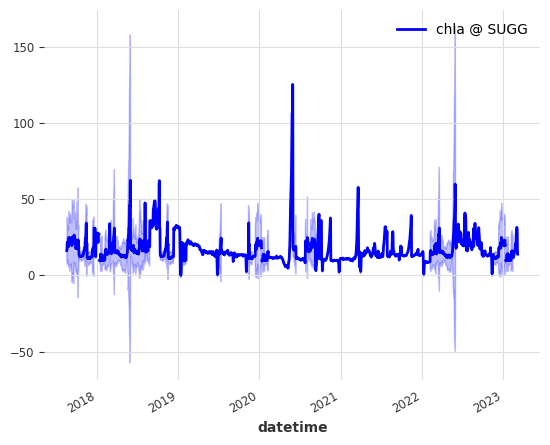

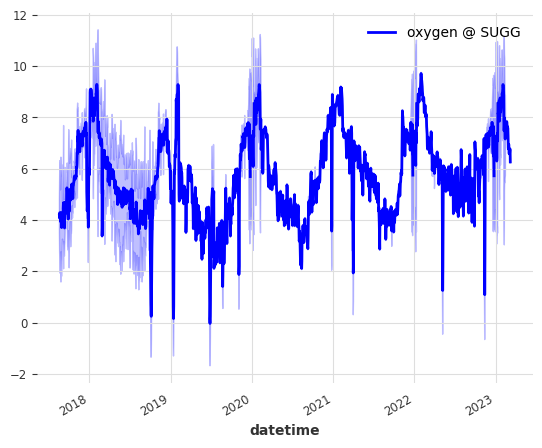

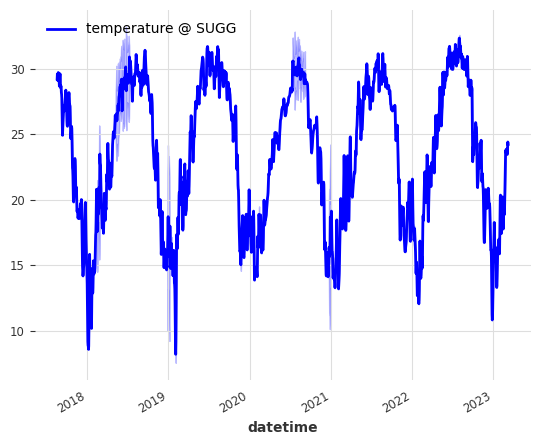

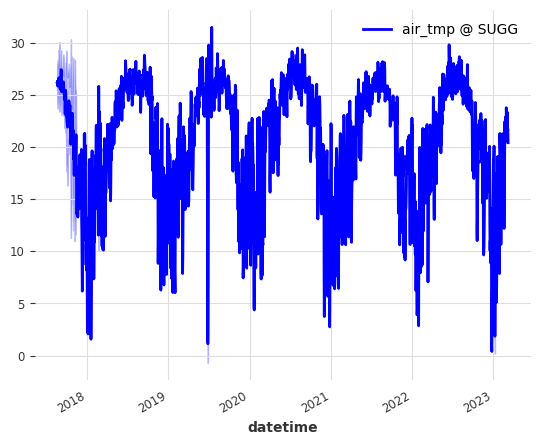

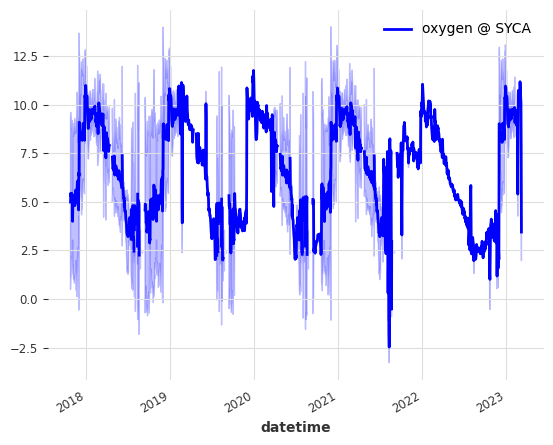

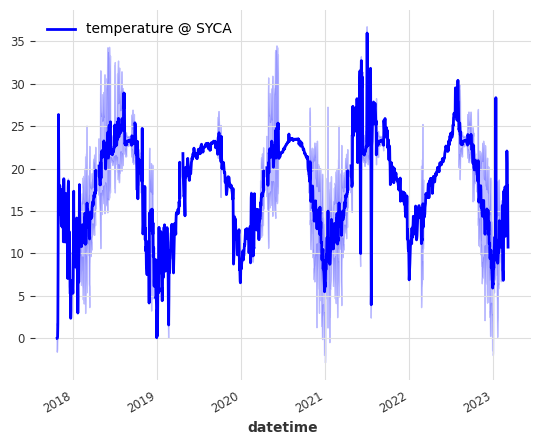

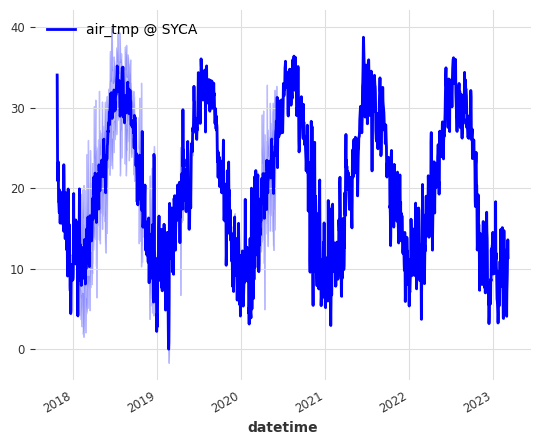

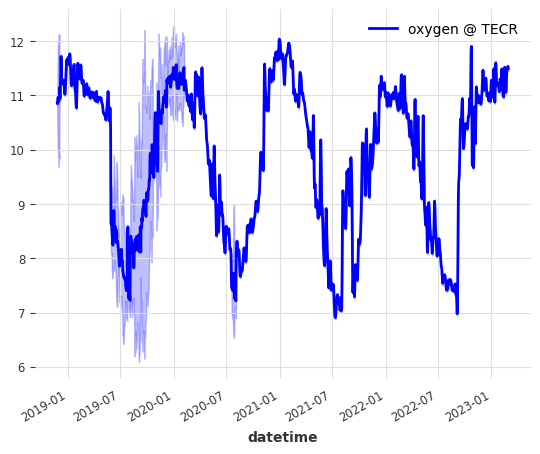

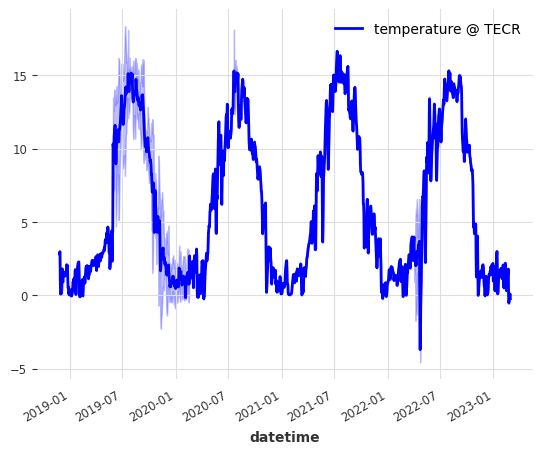

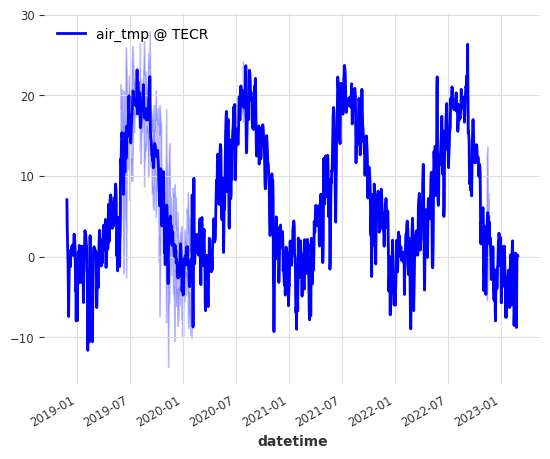

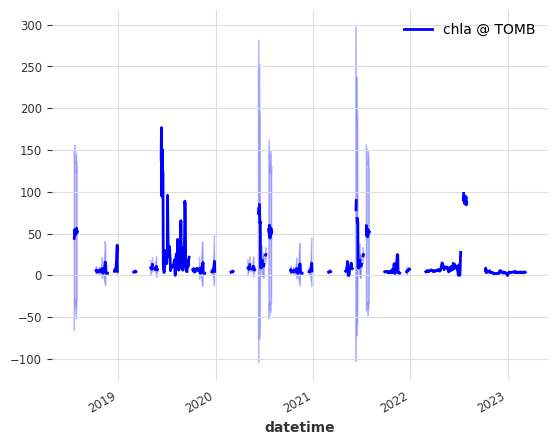

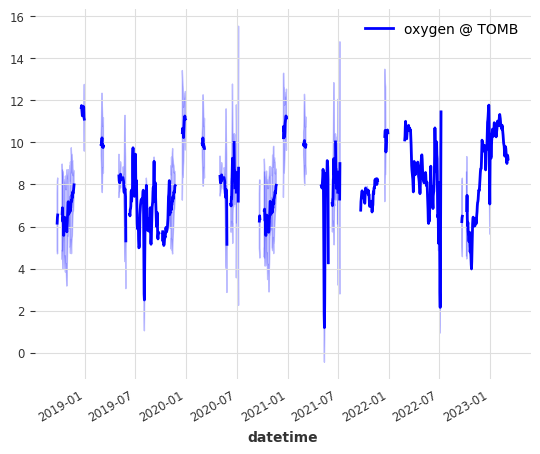

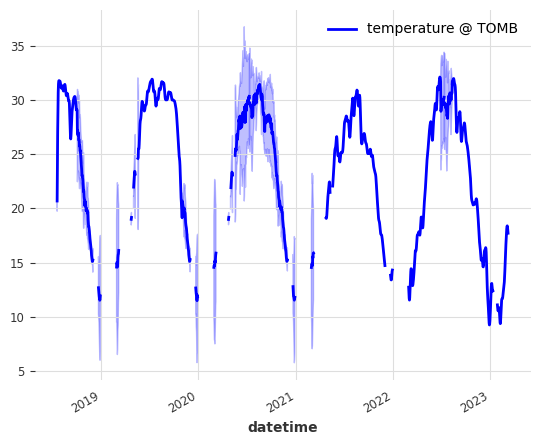

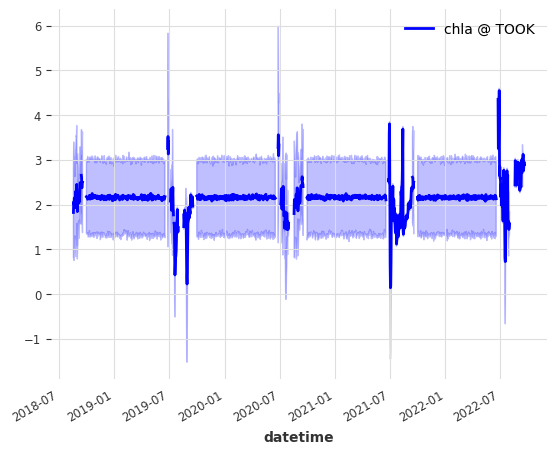

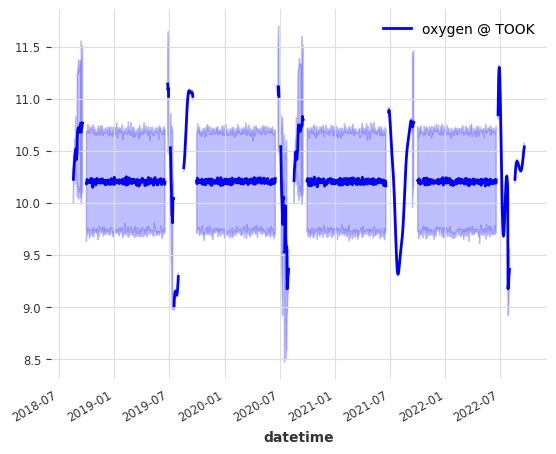

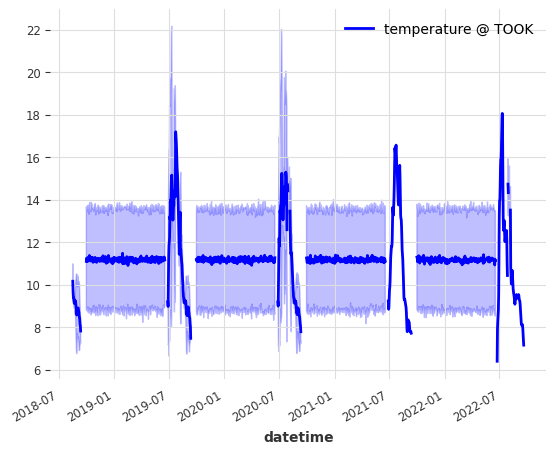

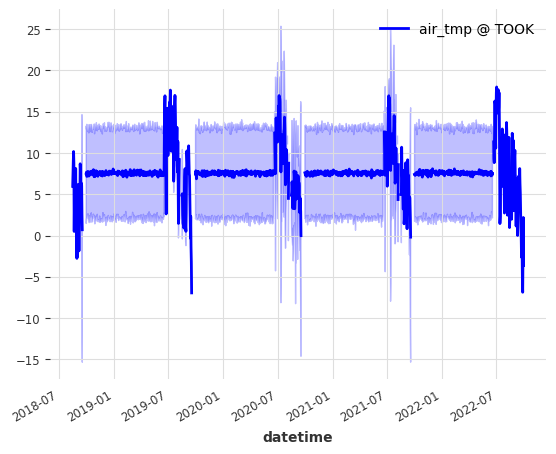

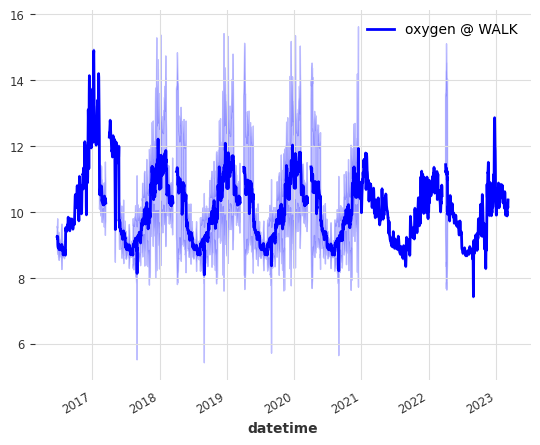

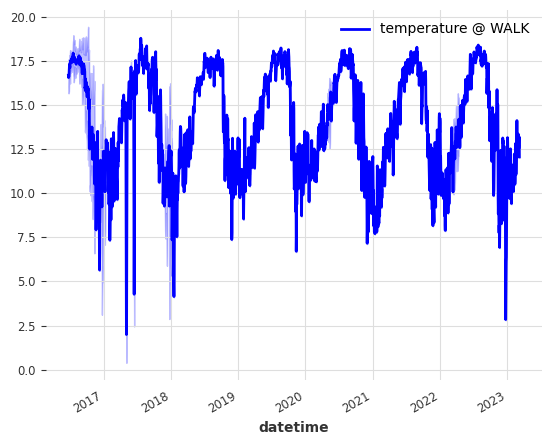

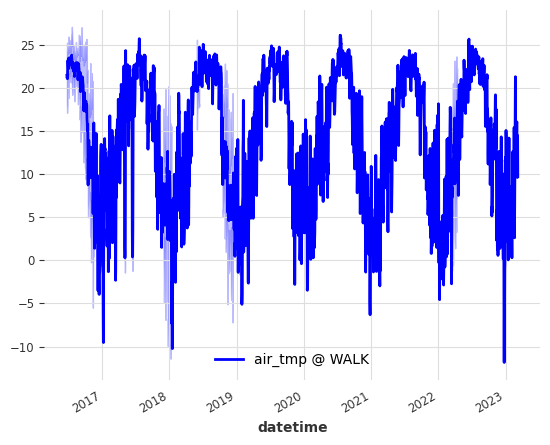

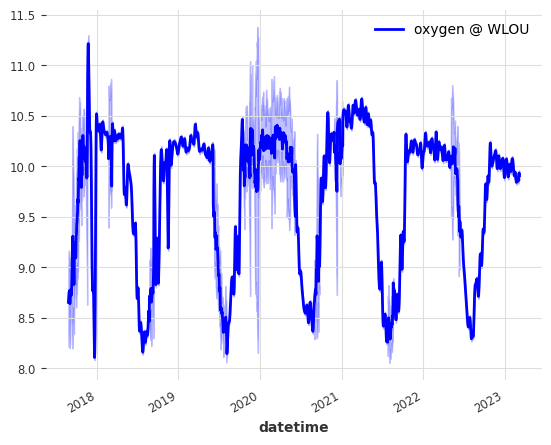

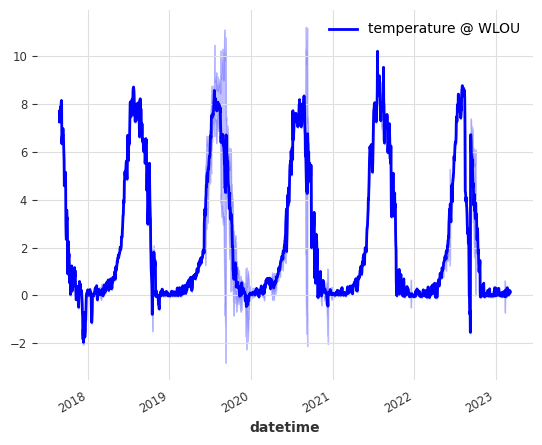

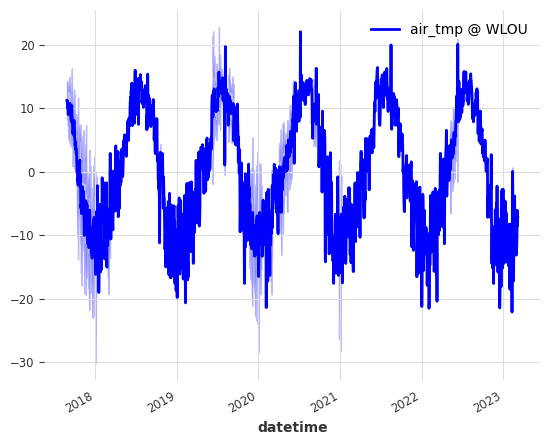

In [7]:
for site in targets.site_id.unique():
    data_preprocessor.plot_by_site(site)

> /tmp/ipykernel_606302/2632779713.py(60)make_forecasts()
     58         import pdb; pdb.set_trace()
     59         # Drawing samples from a gaussian centered at historical mean and std/2
---> 60         samples = np.array([np.random.normal(self.doy_df.loc[self.doy_df.index == doy]["mean"],
     61                                     self.doy_df.loc[self.doy_df.index == doy]["std"],
     62                                     size=(1, 500)) for doy in forecast_df.index])



ipdb>  c


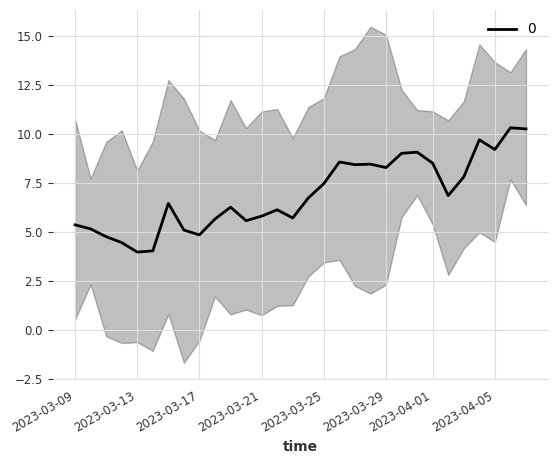

In [99]:
test = HistoricalForecaster(targets, "POSE", target_variable="temperature", validation_split_date="2023-03-09")
test.make_forecasts()
test.forecast_ts.plot()

In [6]:
targets = pd.read_csv("targets.csv.gz")
    
model = HistoricalForecaster(
                    targets=targets,
                    validation_split_date="2023-03-02",
                    site_id="TOMB",
                    target_variable="oxygen",
                    output_csv_name=None,
)
model.make_forecasts()
model.forecast_ts.plot()

/home/rstudio/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


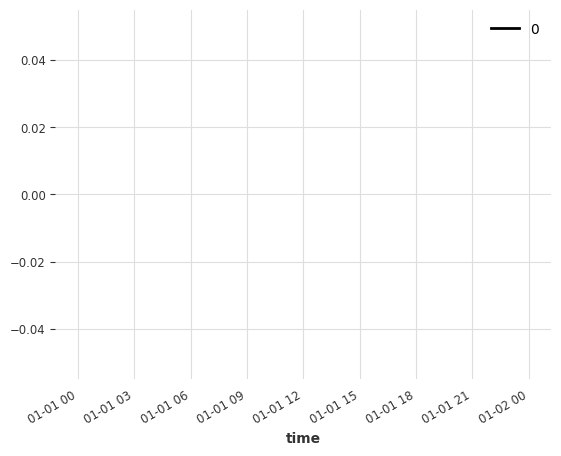

In [7]:
model.forecast_ts.plot()

Need to rework this so that I fill in values according to historical mean and std

In [140]:
data_preprocessor = TimeSeriesPreprocessor()

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


> /tmp/ipykernel_606302/637191707.py(57)make_stitched_series()
     55         for index, row in gap_series.iterrows():
     56             if row["gap_size"] > 7:
---> 57                 for date in pd.date_range(row["gap_start"], row["gap_end"]):
     58                     # Finding the mean and std from the doy dictionary
     59                     mean, std = self.doy_dict[var].loc[date.dayofyear]



ipdb>  n


> /tmp/ipykernel_606302/637191707.py(59)make_stitched_series()
     57                 for date in pd.date_range(row["gap_start"], row["gap_end"]):
     58                     # Finding the mean and std from the doy dictionary
---> 59                     mean, std = self.doy_dict[var].loc[date.dayofyear]
     60                     stitched_df.loc[date] = np.random.normal(mean, std, size=(500,))
     61                     import pdb; pdb.set_trace()



ipdb>  n


> /tmp/ipykernel_606302/637191707.py(60)make_stitched_series()
     58                     # Finding the mean and std from the doy dictionary
     59                     mean, std = self.doy_dict[var].loc[date.dayofyear]
---> 60                     stitched_df.loc[date] = np.random.normal(mean, std, size=(500,))
     61                     import pdb; pdb.set_trace()
     62 



ipdb>  stitched_df.loc[date]


0_s0      1.554779
0_s1      0.652128
0_s2     -0.445115
0_s3      0.934502
0_s4     -0.839922
            ...   
0_s495   -0.312244
0_s496   -0.032295
0_s497   -0.461660
0_s498    0.493987
0_s499   -0.832552
Name: 2017-08-28 00:00:00, Length: 500, dtype: float64


ipdb>  n


> /tmp/ipykernel_606302/637191707.py(61)make_stitched_series()
     59                     mean, std = self.doy_dict[var].loc[date.dayofyear]
     60                     stitched_df.loc[date] = np.random.normal(mean, std, size=(500,))
---> 61                     import pdb; pdb.set_trace()
     62 
     63 



ipdb>  stitched_df.loc[date]


0_s0      2.460952
0_s1     -0.685366
0_s2      1.198423
0_s3      1.974386
0_s4      2.849823
            ...   
0_s495    4.009466
0_s496    1.302532
0_s497    1.546860
0_s498    5.052053
0_s499    1.613246
Name: 2017-08-28 00:00:00, Length: 500, dtype: float64


ipdb>  c


> /tmp/ipykernel_606302/637191707.py(57)make_stitched_series()
     55         for index, row in gap_series.iterrows():
     56             if row["gap_size"] > 7:
---> 57                 for date in pd.date_range(row["gap_start"], row["gap_end"]):
     58                     # Finding the mean and std from the doy dictionary
     59                     mean, std = self.doy_dict[var].loc[date.dayofyear]



ipdb>  c


> /tmp/ipykernel_606302/637191707.py(57)make_stitched_series()
     55         for index, row in gap_series.iterrows():
     56             if row["gap_size"] > 7:
---> 57                 for date in pd.date_range(row["gap_start"], row["gap_end"]):
     58                     # Finding the mean and std from the doy dictionary
     59                     mean, std = self.doy_dict[var].loc[date.dayofyear]



ipdb>  pdb.set_trace = lambda: None
ipdb>  c


You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


In [142]:
data_preprocessor.sites_dict.keys()

dict_keys(['BARC'])

In [144]:
data_preprocessor.save()

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consi

In [155]:
data_loaded = TimeSeriesPreprocessor(load_dir_name="test_preprocessed/")

In [156]:
data_loaded.load()

In [ ]:
year = int(self.validation_split_date[:4])
month = int(self.validation_split_date[5:7])
day = int(self.validation_split_date[8:])
split_date = pd.Timestamp(year=year, month=month, day=day)

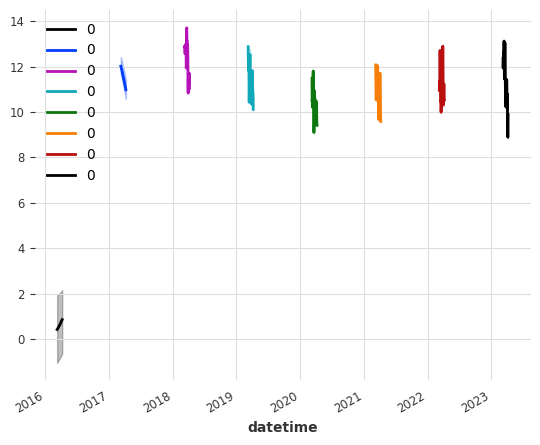

In [49]:
timeseries = []
for year in range(2016, 2024):
    month_start = 3
    day_start = 9
    month_end = 4
    day_end = 7
    ts_start = pd.Timestamp(year=year, month=month_start, day=day_start)
    ts_end = pd.Timestamp(year=year, month=month_end, day=day_end)
    x = data_preprocessor.sites_dict['POSE']['oxygen'].slice(ts_start, ts_end)
    timeseries.append(x)
    x.plot()

In [56]:
import copy
final_series = copy.copy(timeseries[1])
for item in timeseries[2:]:
    final_series = final_series.concatenate(item, ignore_time_axis=True)
    

In [57]:
df = final_series.median().pd_dataframe()
result_df = pd.concat([df[col] for col in df.columns], axis=0, ignore_index=True)

In [58]:
result_df.median(), result_df.std()

(11.307841704733868, 0.9447281347602419)

In [59]:
result_df.mean() - 2*result_df.std(), result_df.mean() + 2*result_df.std()

(9.396332827111198, 13.175245366152165)

In [40]:
result_df[30:60]

30    10.014446
31     5.873474
32     0.710057
33     0.592736
34     0.496010
35    -0.359811
36    -0.328696
37    -0.747727
38     1.231334
39     4.932567
40     4.730398
41     5.338257
42     8.444836
43     6.428716
44     2.374283
45     5.393148
46     9.090528
47    10.563630
48    12.114891
49    14.084506
50    13.955076
51     9.360621
52     8.197632
53     9.716656
54     9.343692
55    10.990232
56    14.928321
57    14.314275
58    12.674245
59     7.591654
Name: 0, dtype: float64

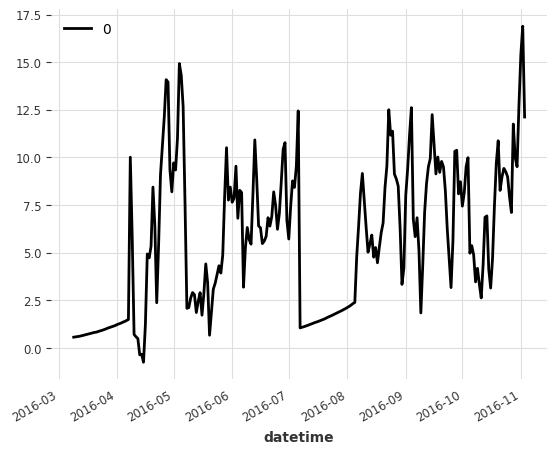

In [35]:
final_series.median().plot()

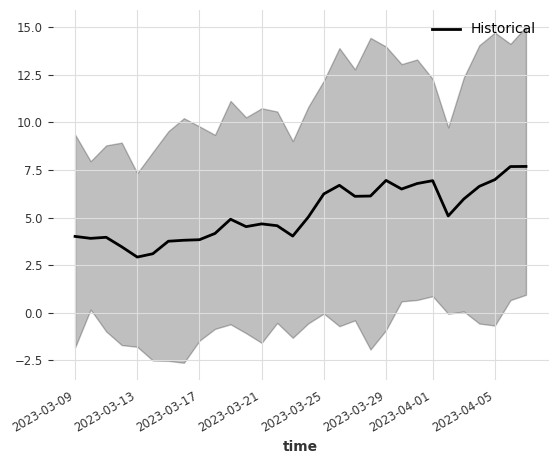

In [105]:
historical_model = HistoricalForecaster_2(data_preprocessor=data_preprocessor,
                          output_csv_name="historical_forecaster_output.csv",
                          validation_split_date="2023-03-09",
                          forecast_horizon=30,
                          site_id="POSE",
                          target_variable="temperature")
historical_model.make_forecasts()
historical_model.forecast_ts.plot(label="Historical")